In [5]:
# credits to Ashok Litwin-Kumar who provided an earlier version of this notebook
import torch
import time
from torch.autograd import Variable
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
%matplotlib inline
%matplotlib notebook

In [6]:
N = 100 #RNN units
R = 1 #readout
B = 20 #batches per epoch

Nepochs = 1000
doplot = True
Nepochsplot = 20 # plot output every certain number of epochs
dt = 0.1 # step size in time discretization
T = 20
period = 10
NT = int(T/dt)
np.random.seed(1) #fix seed of random number generator

lr = .001 # learning rate used in ADAM
sig = 0.1 #noise in initial state

In [7]:
t = dt*np.arange(NT) # time

s = Variable(torch.zeros(NT,1,B),requires_grad=False)
rtarg = Variable(torch.zeros(NT,R,B),requires_grad=False)
for bi in range(B):
    rtarg[:,0,bi] = torch.FloatTensor(np.sign(np.sin(2*np.pi*t/period)))

ws0 = np.random.standard_normal([N,1]).astype(np.float32)
J0 = np.random.standard_normal([N,N]).astype(np.float32)/np.sqrt(N)
wr0 = np.random.standard_normal([R,N]).astype(np.float32)/np.sqrt(N)
b0 = np.zeros([N,1]).astype(np.float32)
ws = Variable(torch.from_numpy(ws0),requires_grad=True)
J = Variable(torch.from_numpy(J0),requires_grad=True)
wr = Variable(torch.from_numpy(wr0),requires_grad=True)
b = Variable(torch.from_numpy(b0),requires_grad=True)
opt = torch.optim.Adam([J,wr,b,ws],lr=lr)
torch.manual_seed(7)
xinit = 0.5*torch.randn(N,1)


<IPython.core.display.Javascript object>


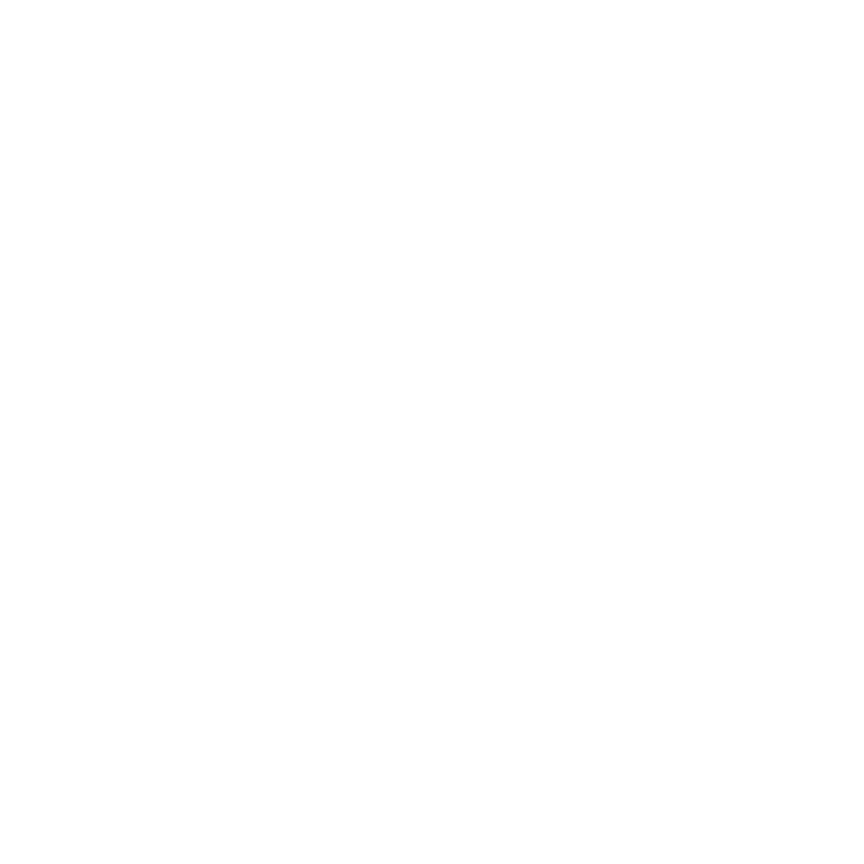

train time:  77.59038853645325


<IPython.core.display.Javascript object>


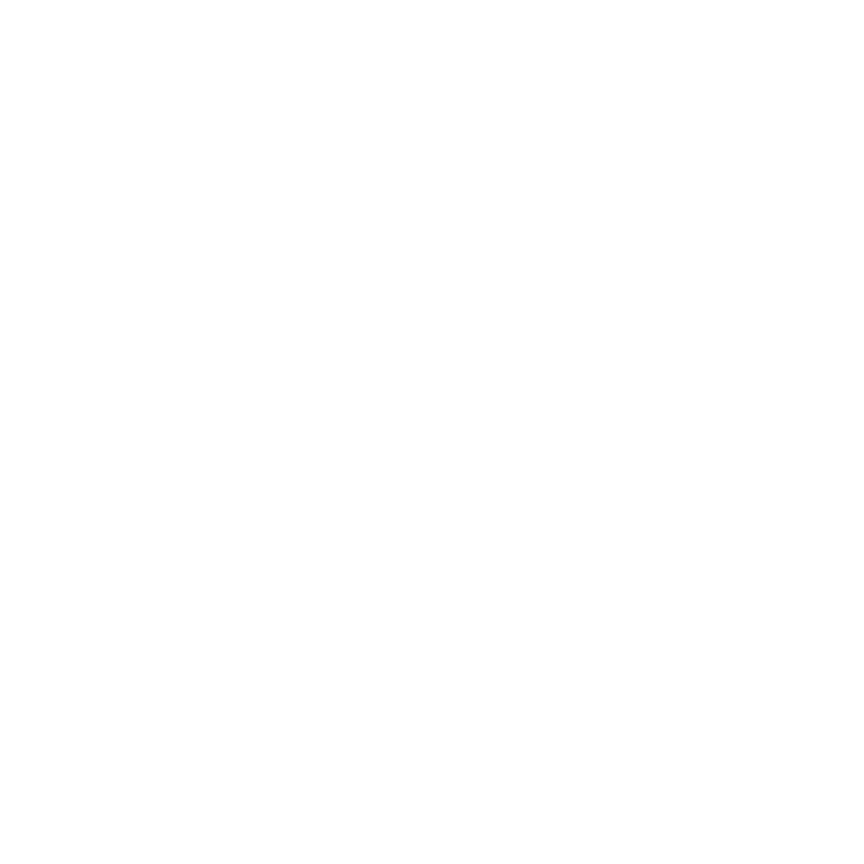

<IPython.core.display.Javascript object>


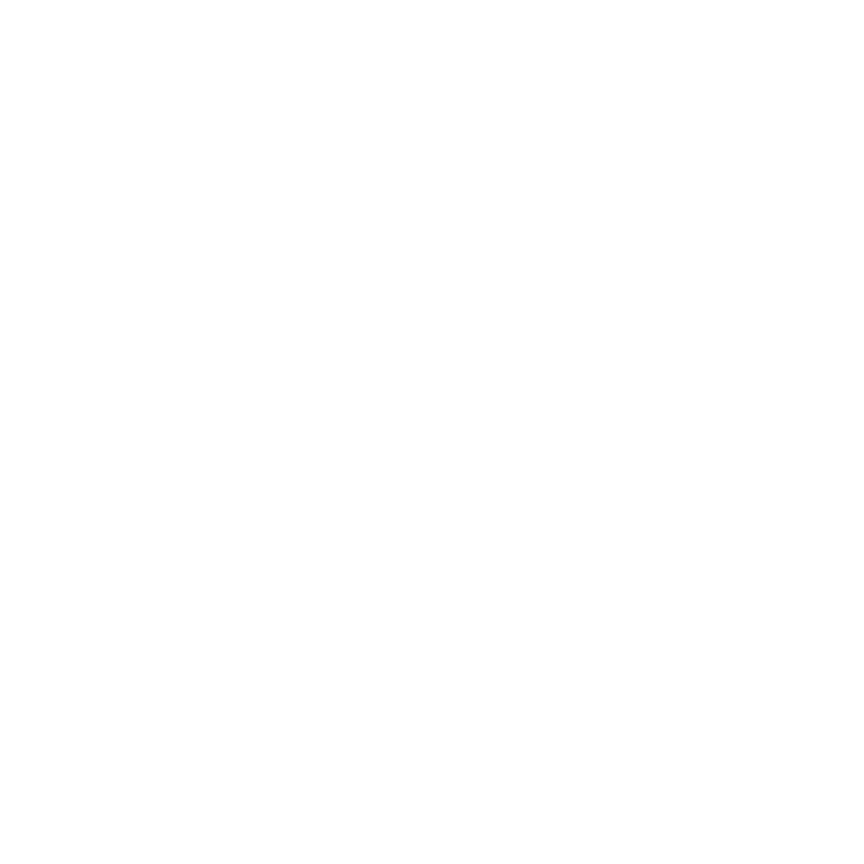

<IPython.core.display.Javascript object>


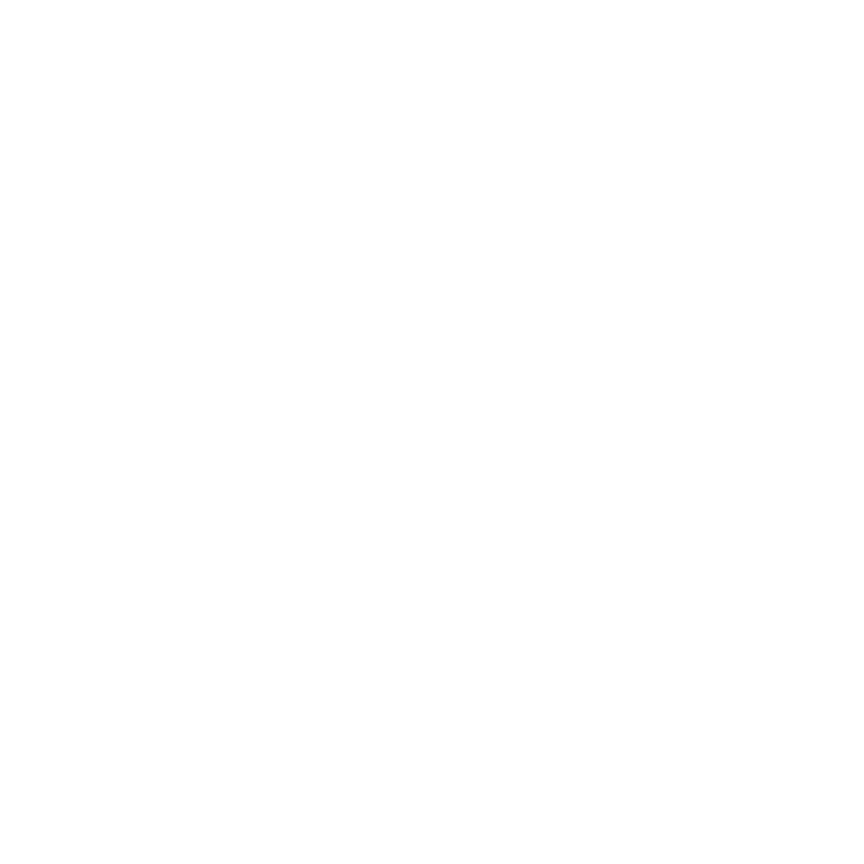

<IPython.core.display.Javascript object>


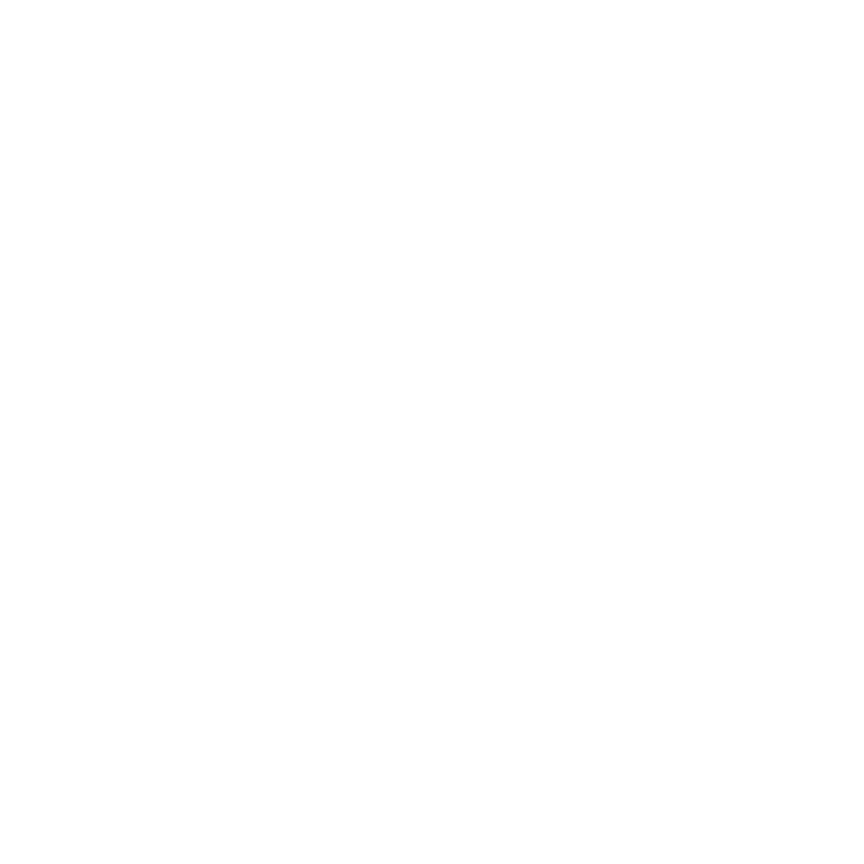

<IPython.core.display.Javascript object>


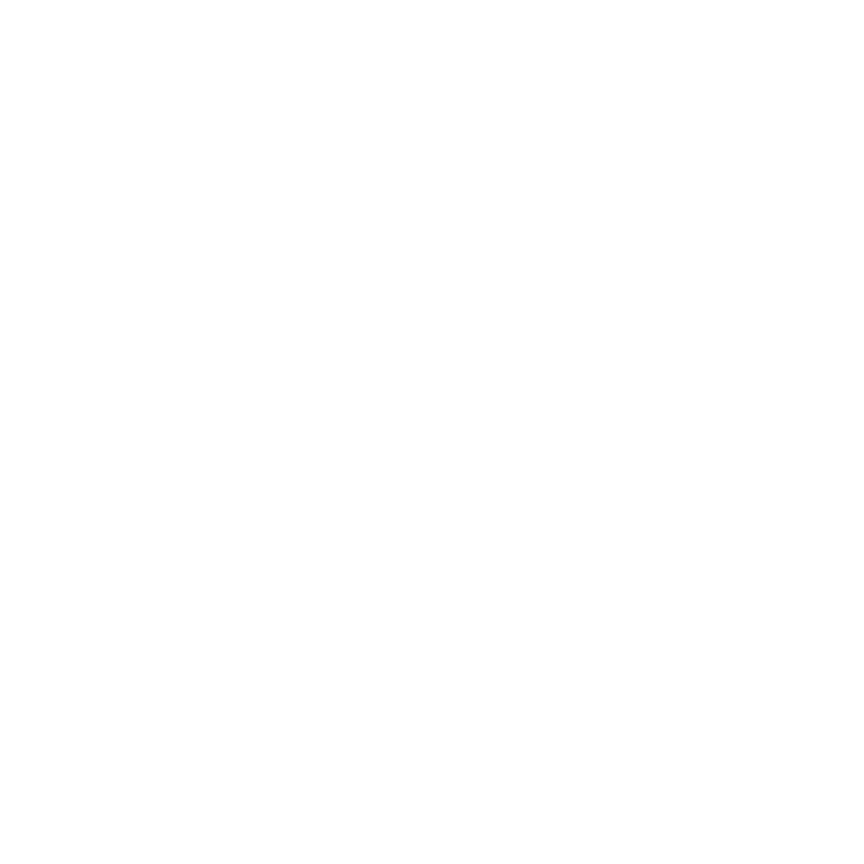

<IPython.core.display.Javascript object>


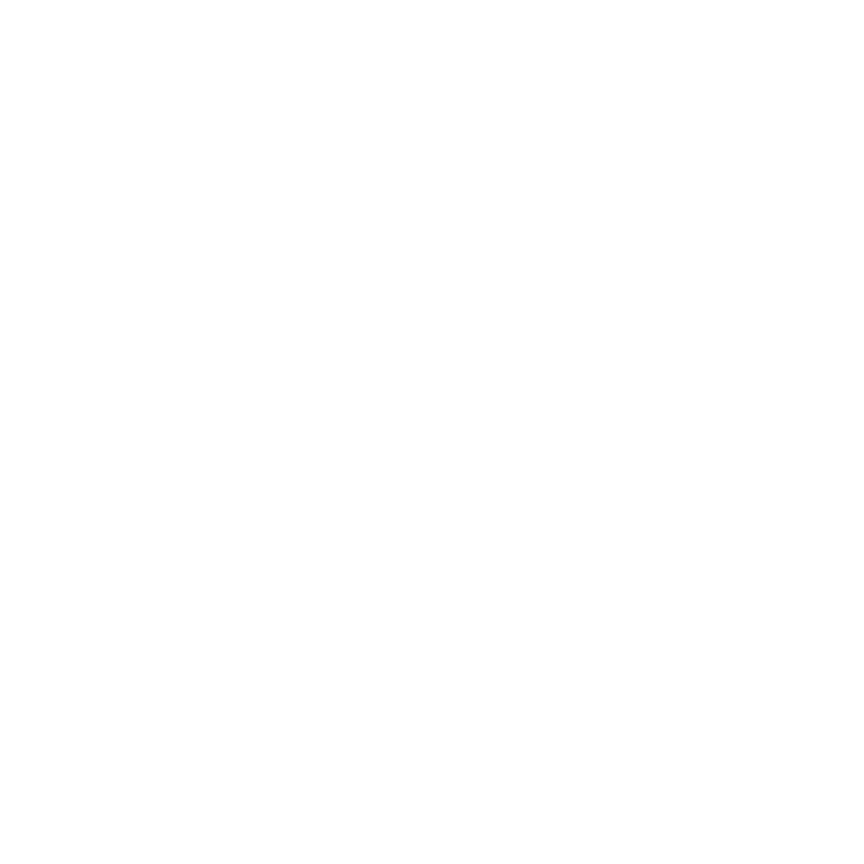

<IPython.core.display.Javascript object>


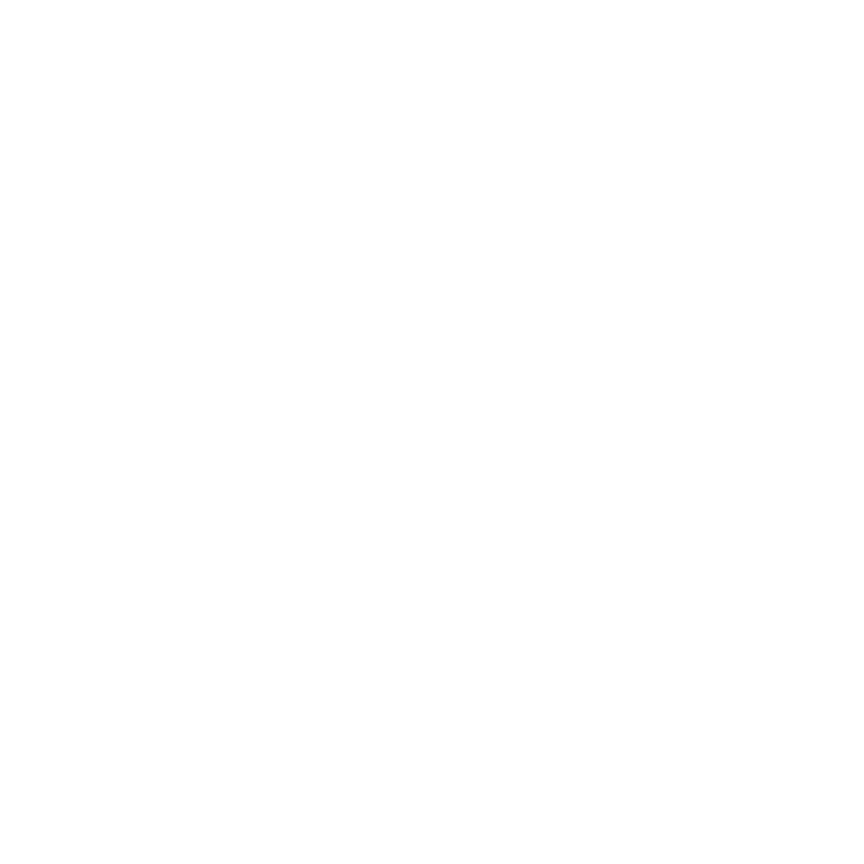

<IPython.core.display.Javascript object>


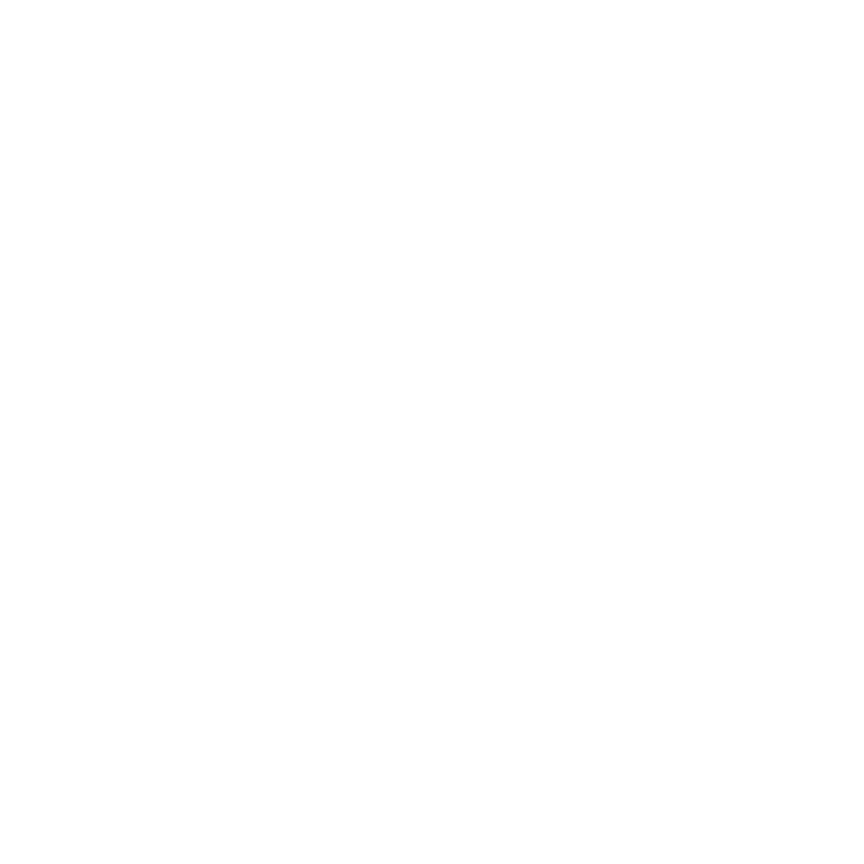

<IPython.core.display.Javascript object>


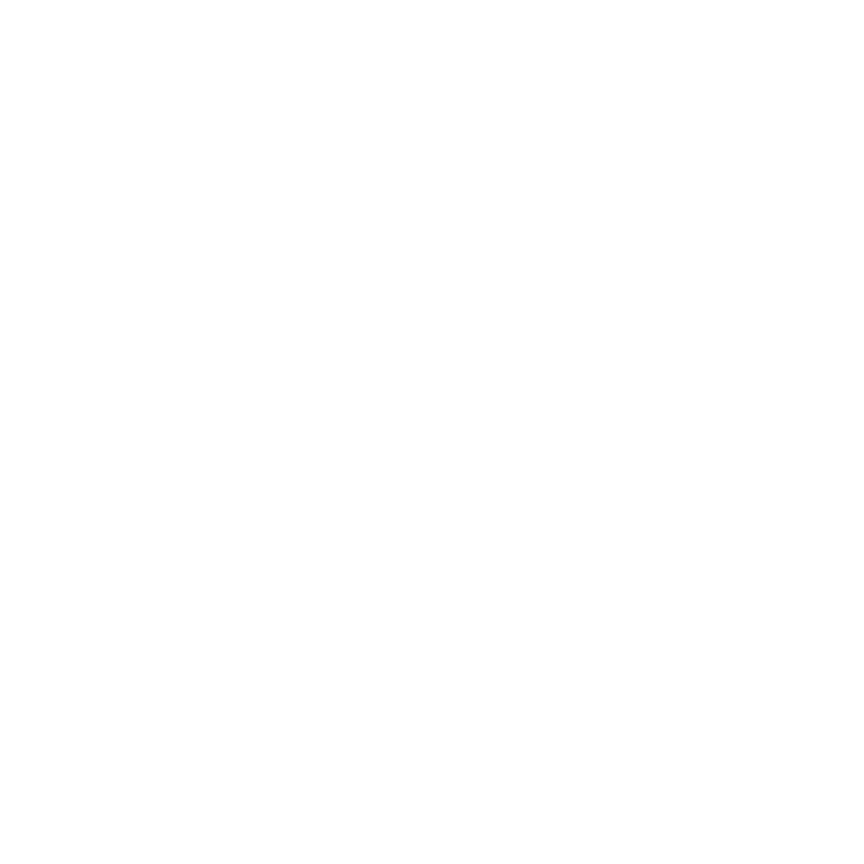

<IPython.core.display.Javascript object>


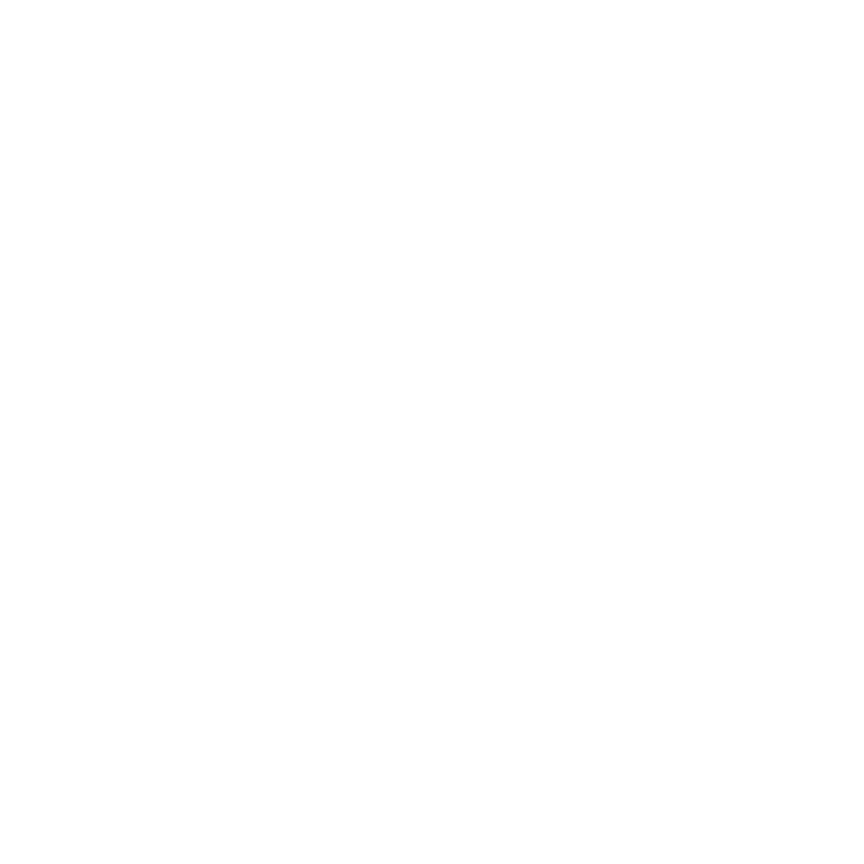

<IPython.core.display.Javascript object>


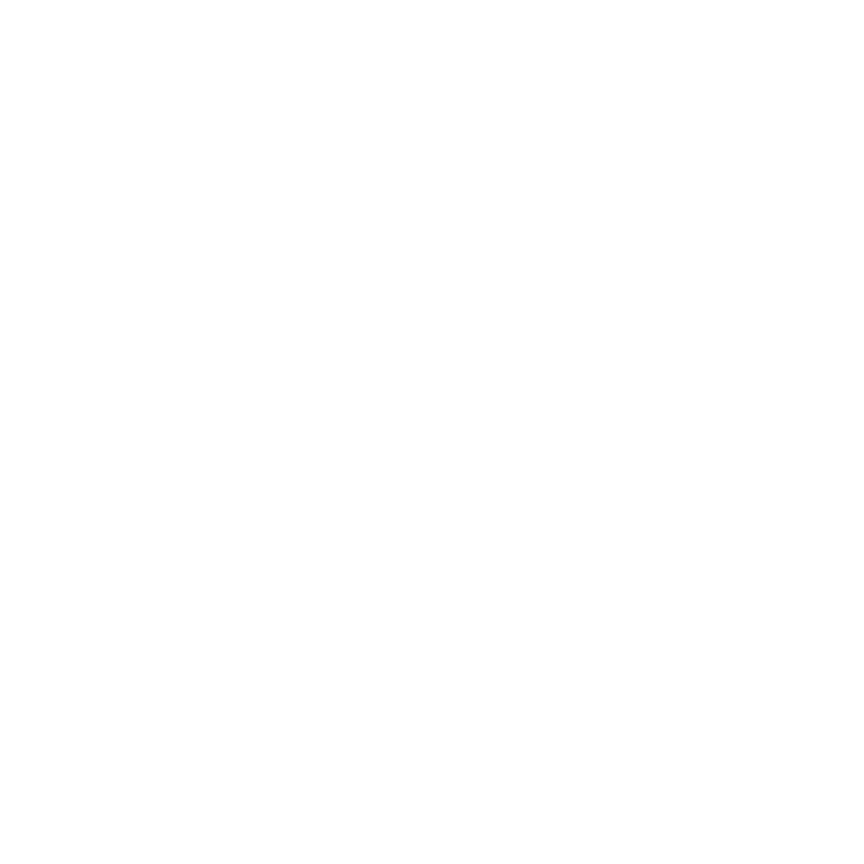

<IPython.core.display.Javascript object>


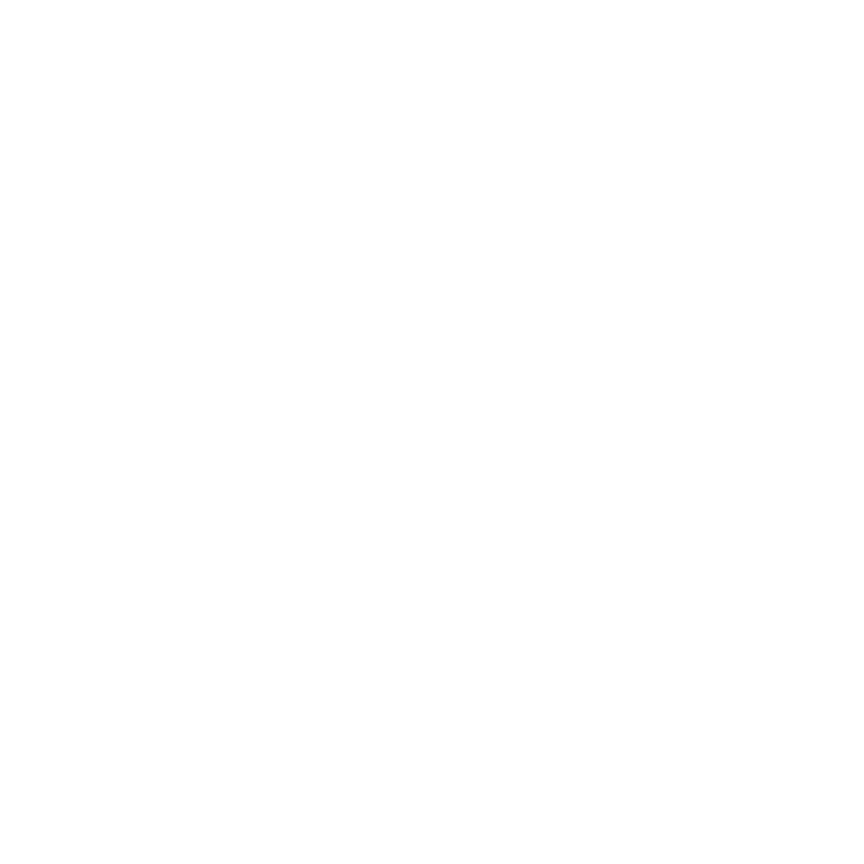

<IPython.core.display.Javascript object>


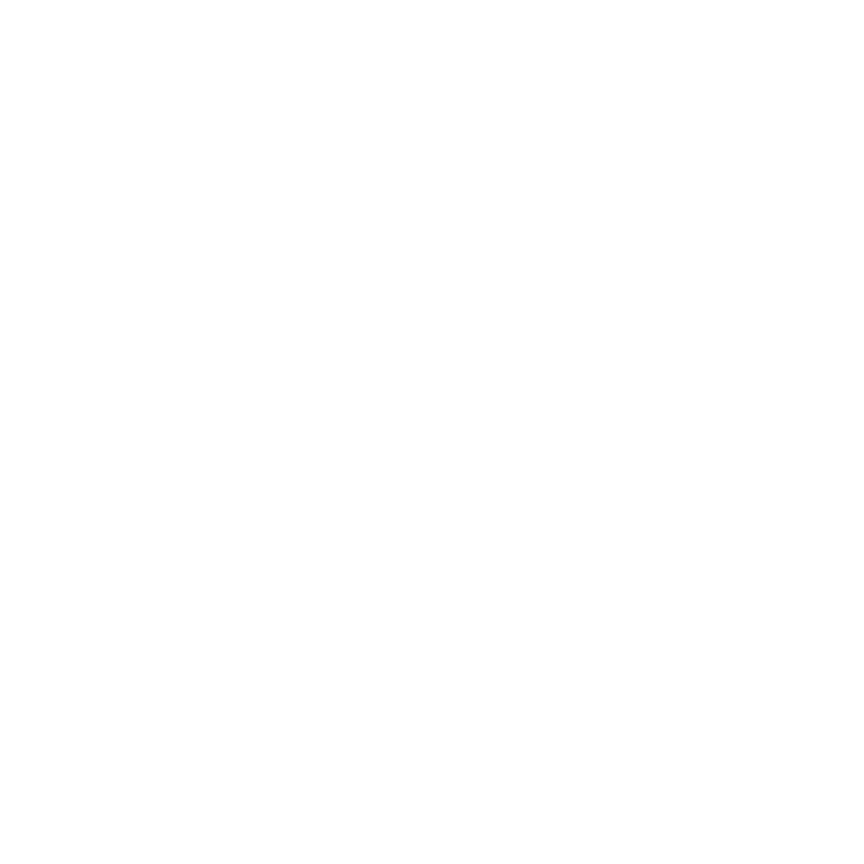

<IPython.core.display.Javascript object>


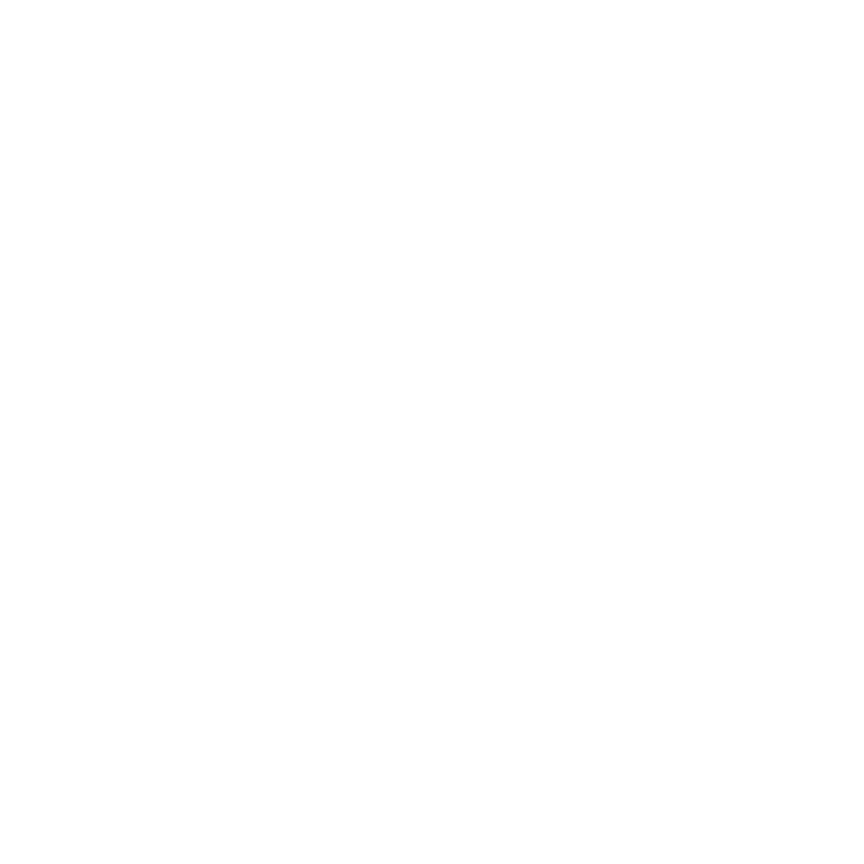

<IPython.core.display.Javascript object>


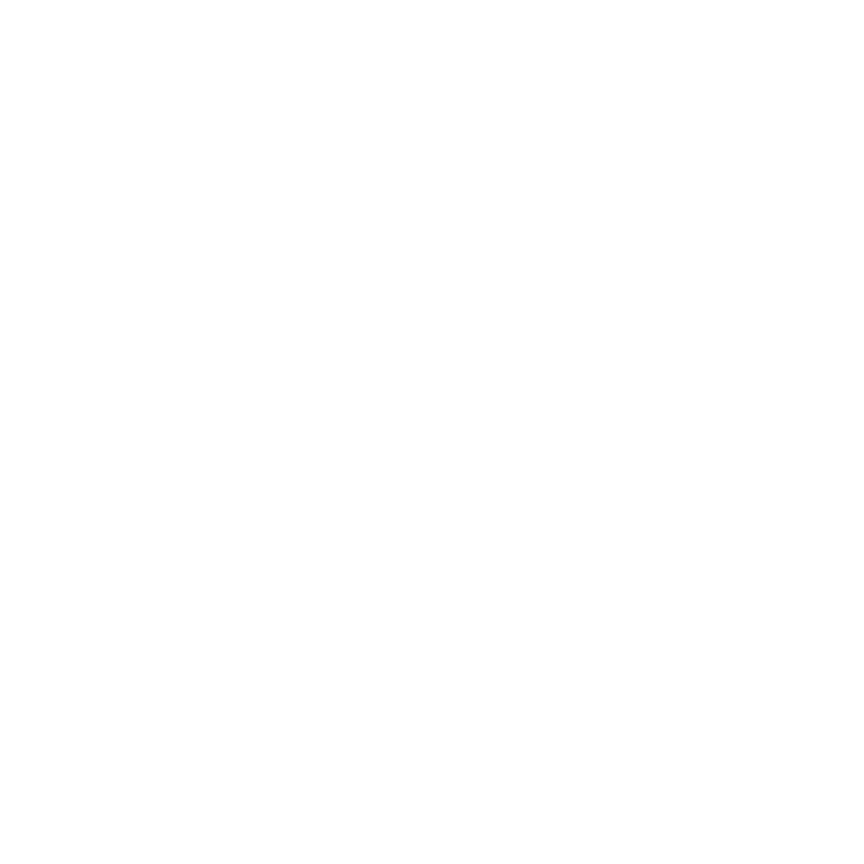

<IPython.core.display.Javascript object>


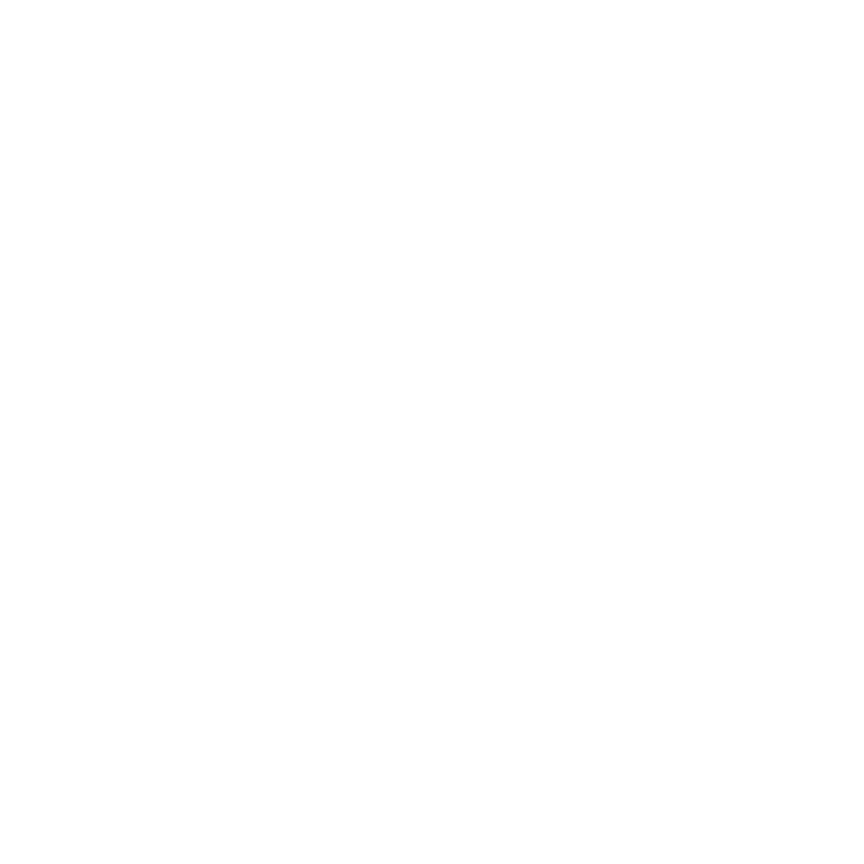

<IPython.core.display.Javascript object>


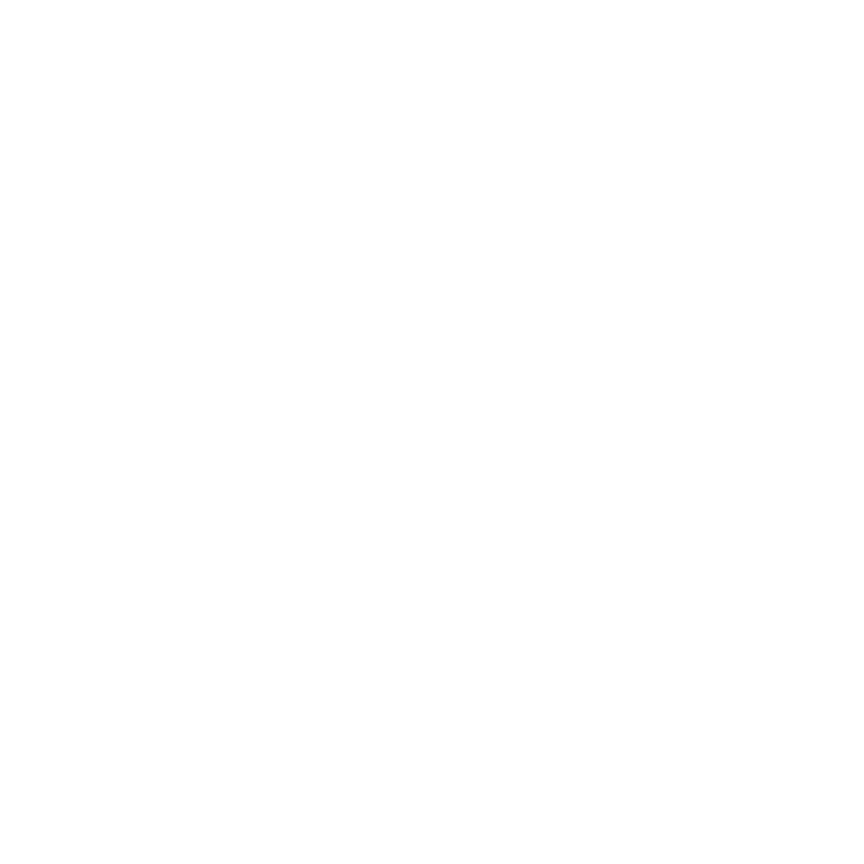

<IPython.core.display.Javascript object>


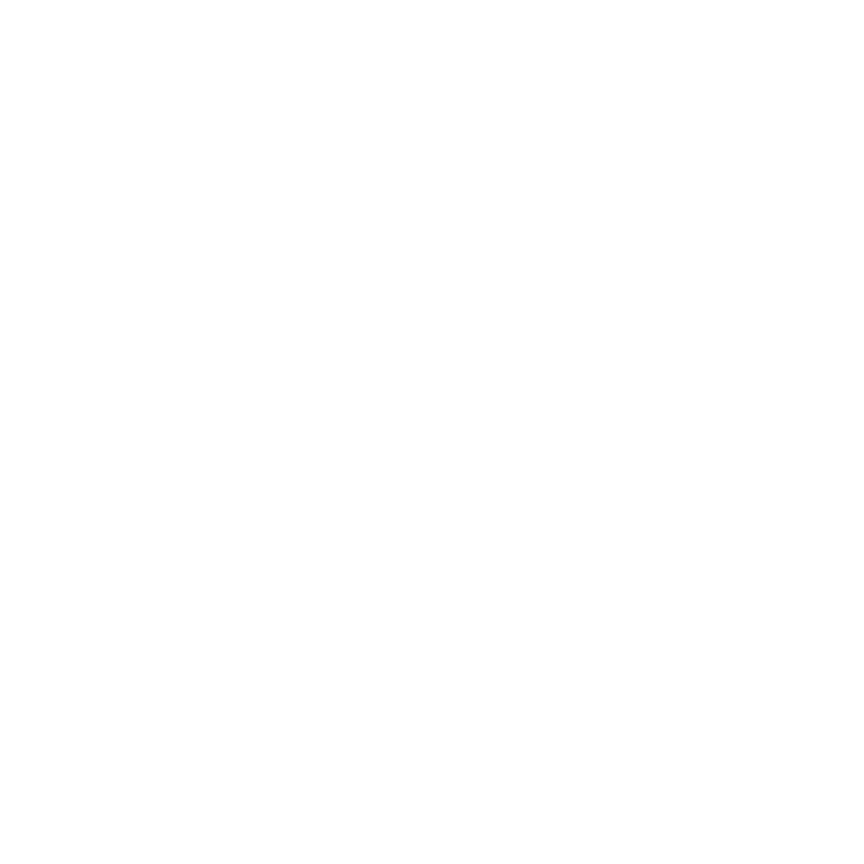

<IPython.core.display.Javascript object>


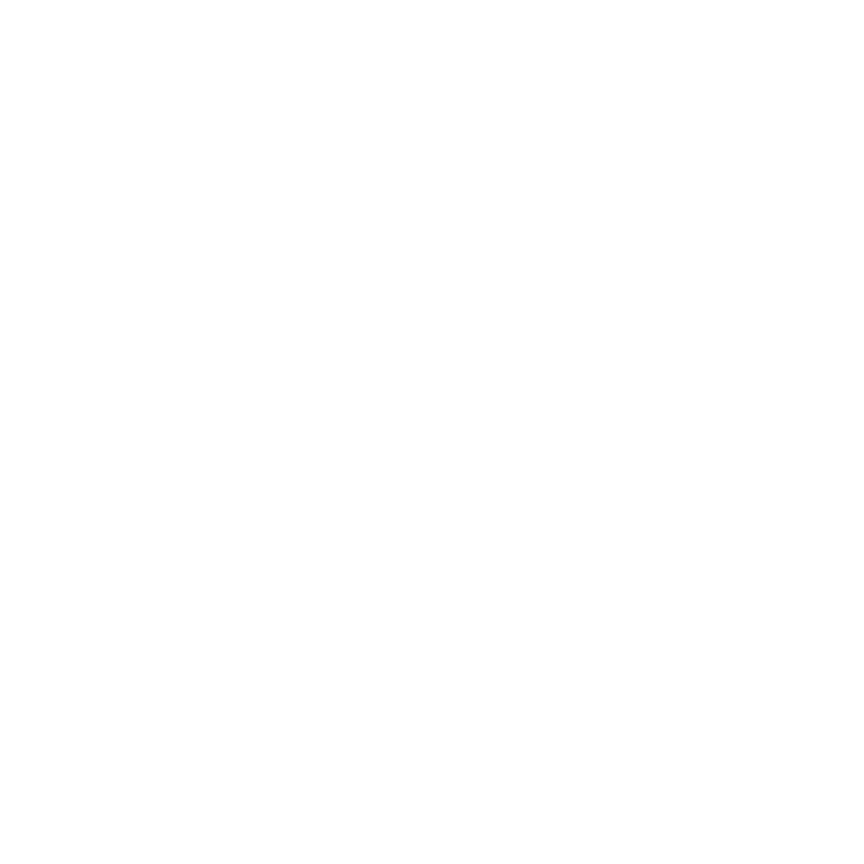

<IPython.core.display.Javascript object>


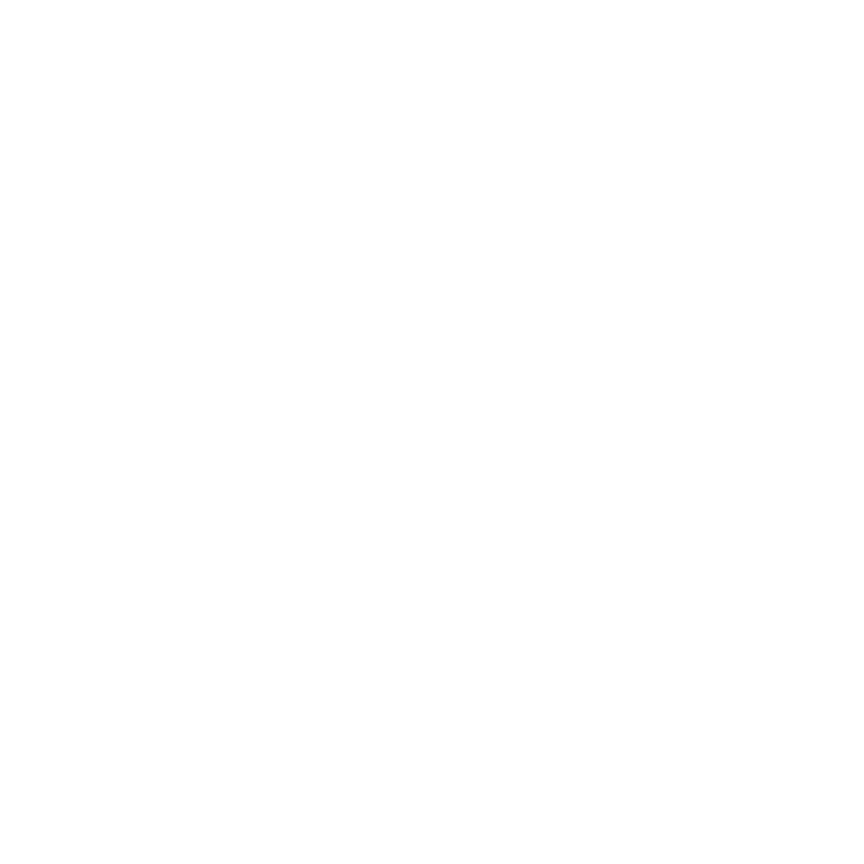

<IPython.core.display.Javascript object>


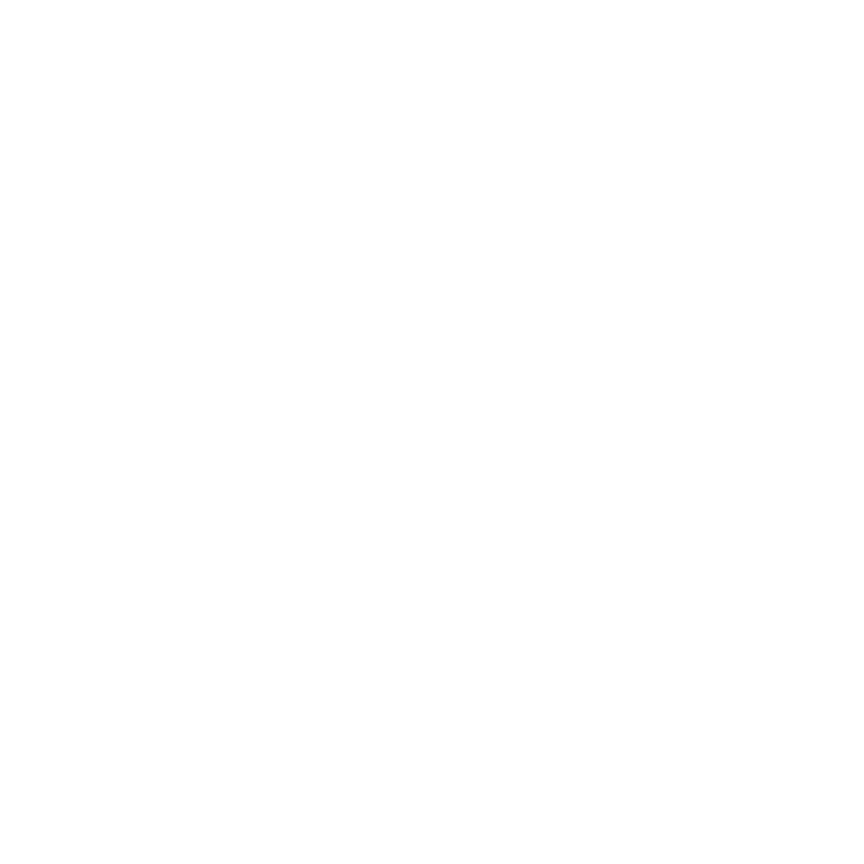

<IPython.core.display.Javascript object>


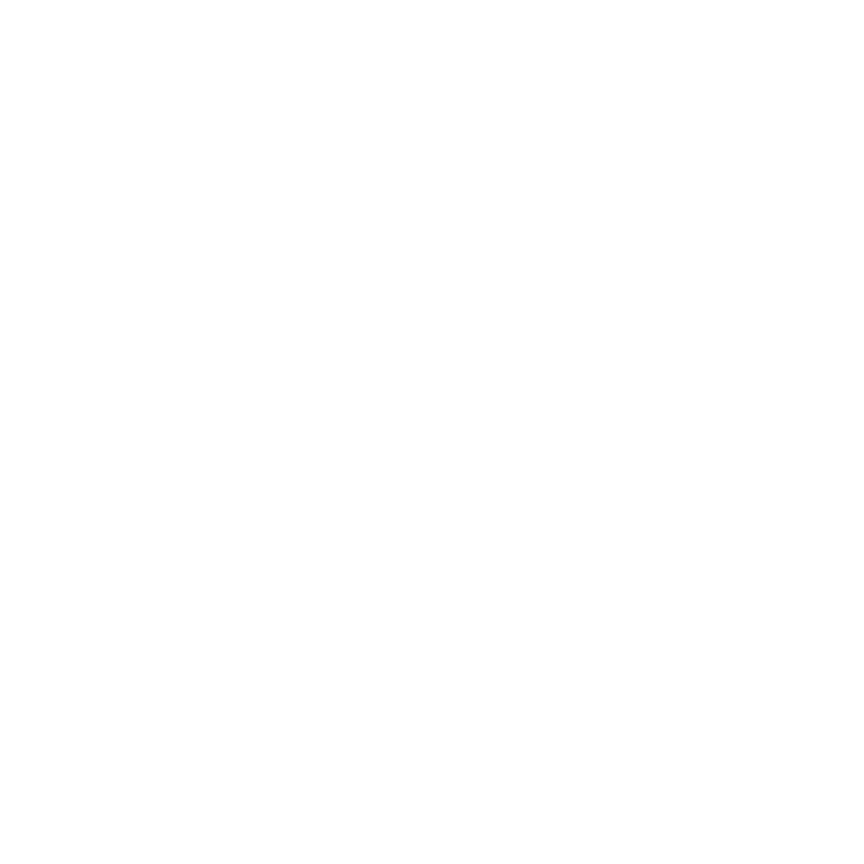

<IPython.core.display.Javascript object>


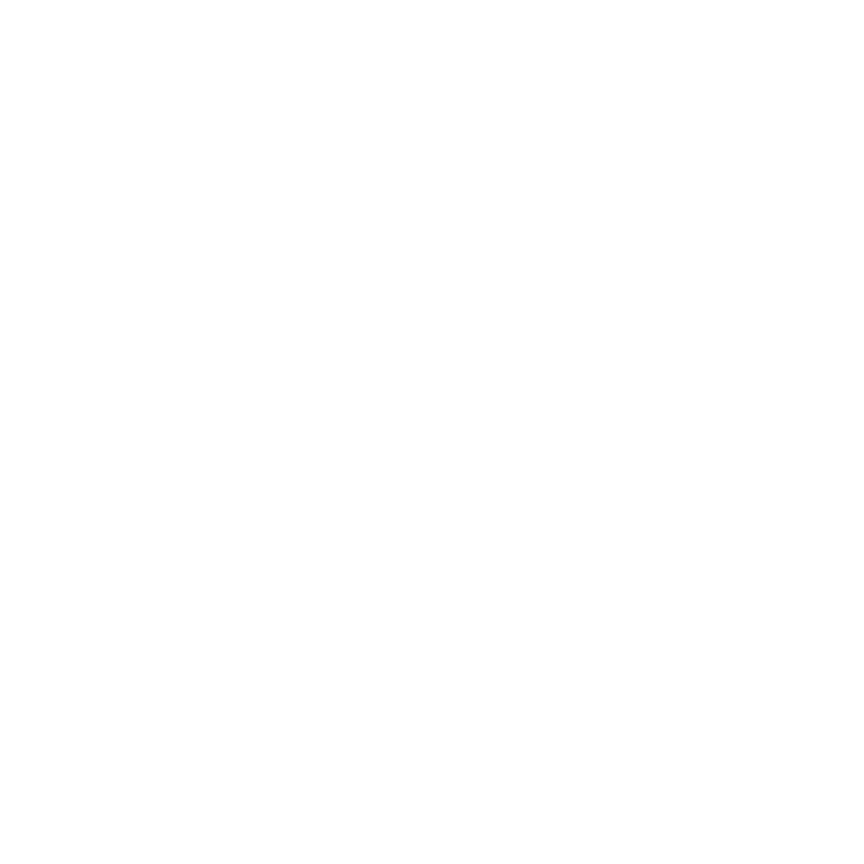

<IPython.core.display.Javascript object>


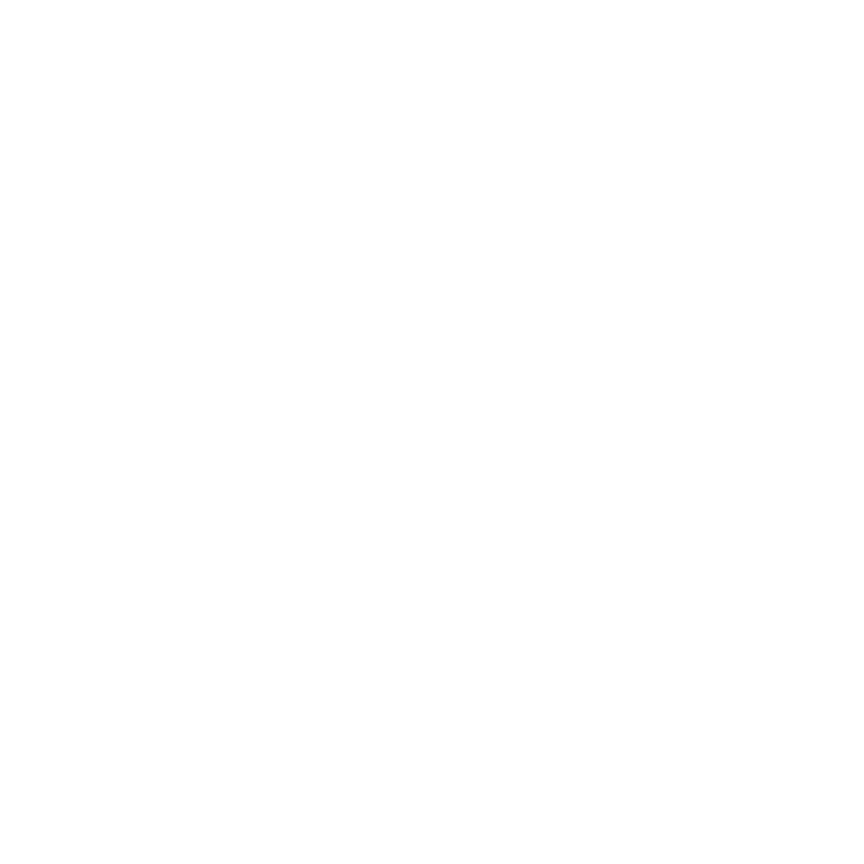

<IPython.core.display.Javascript object>


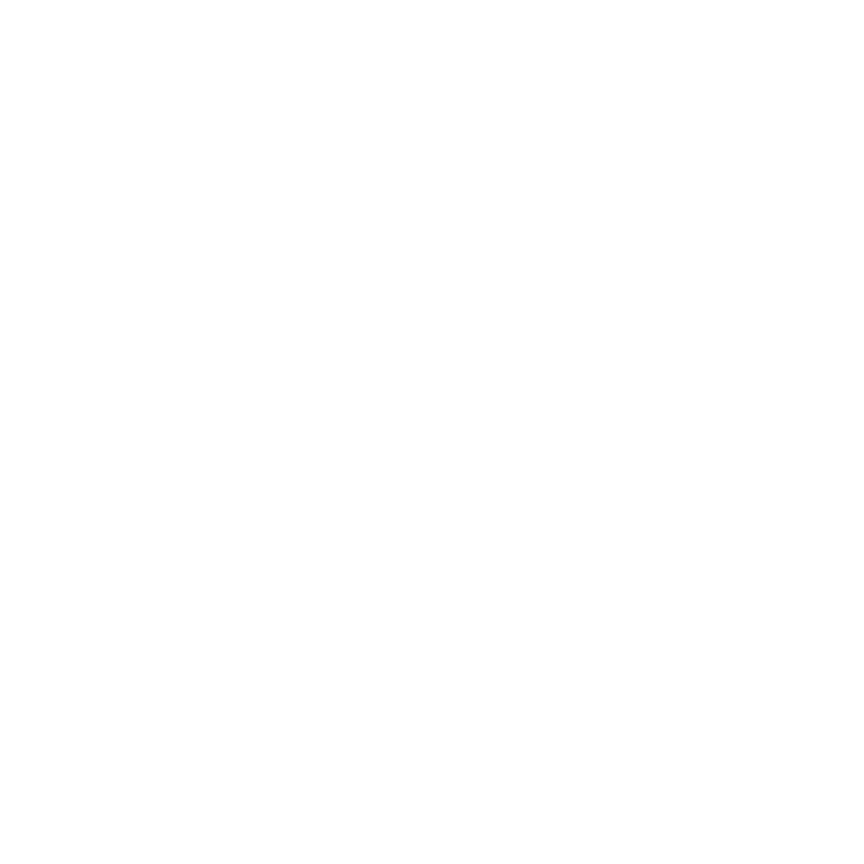

<IPython.core.display.Javascript object>


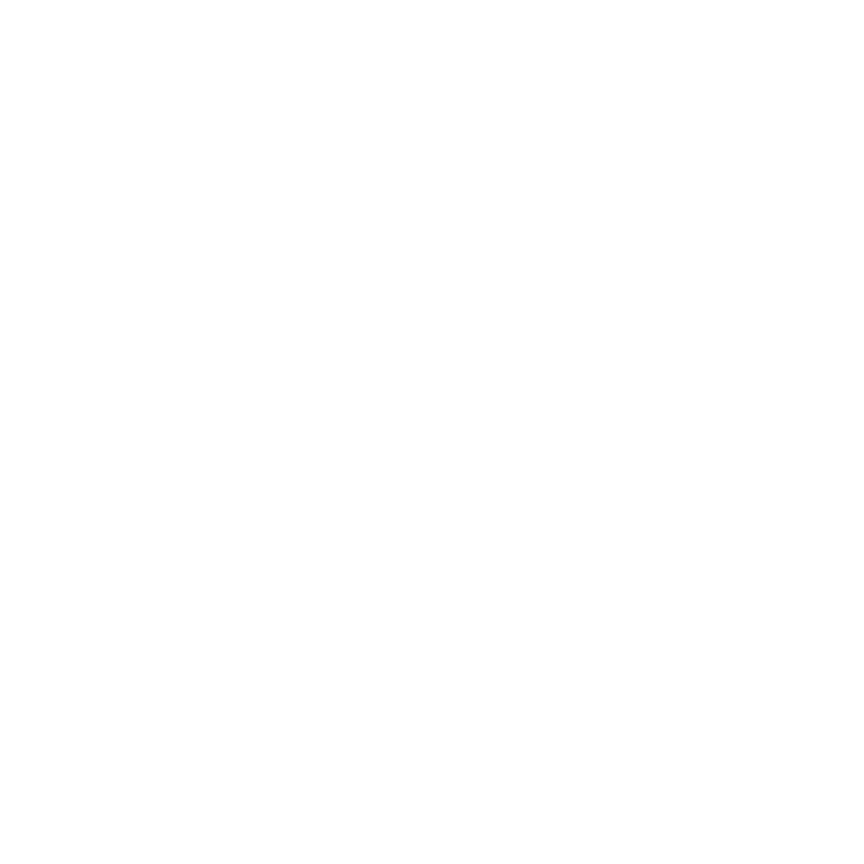

<IPython.core.display.Javascript object>


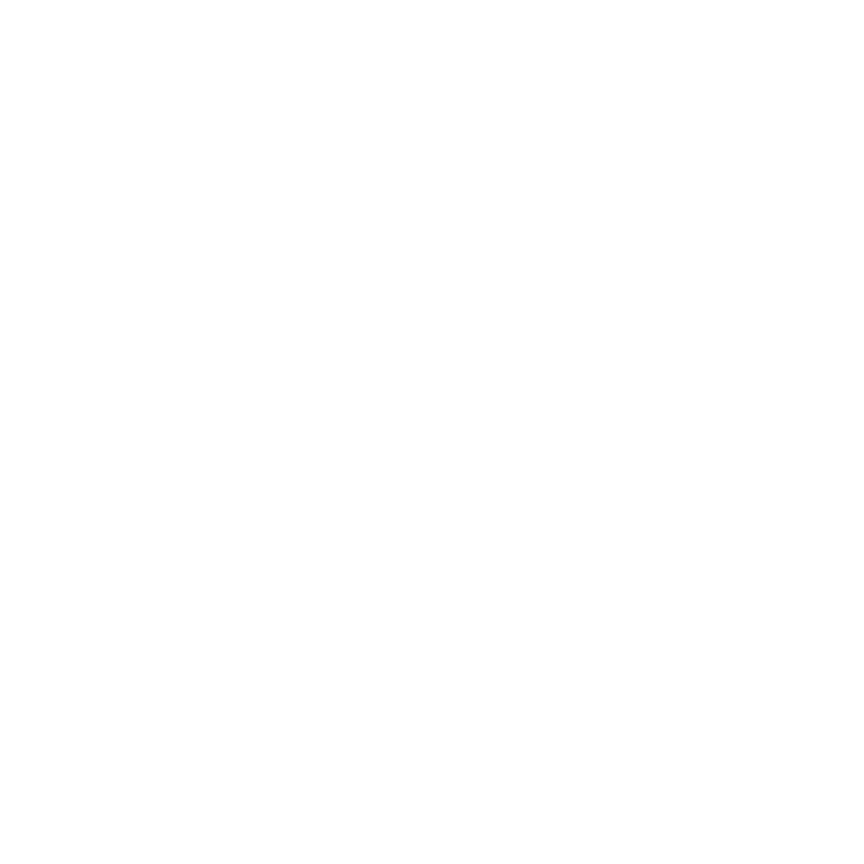

<IPython.core.display.Javascript object>


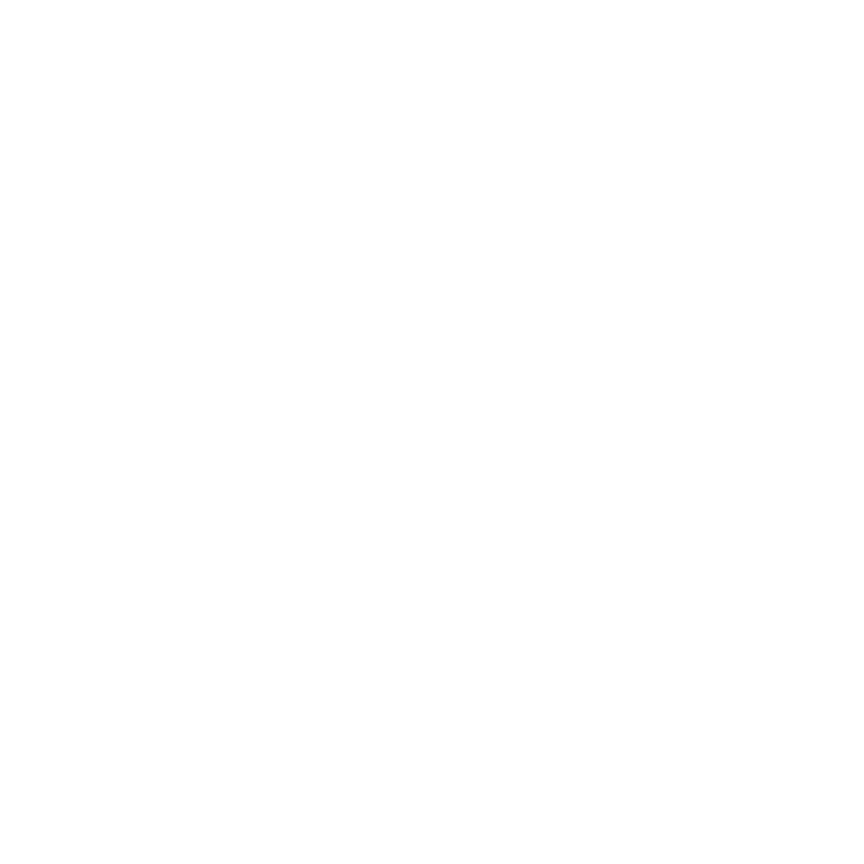

<IPython.core.display.Javascript object>


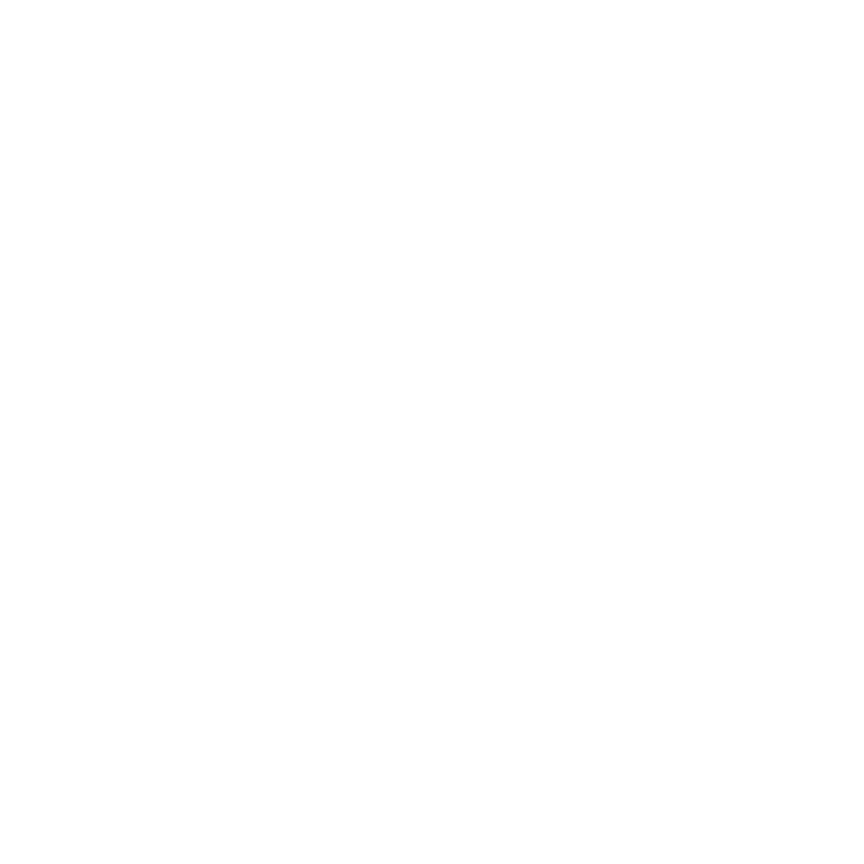

<IPython.core.display.Javascript object>


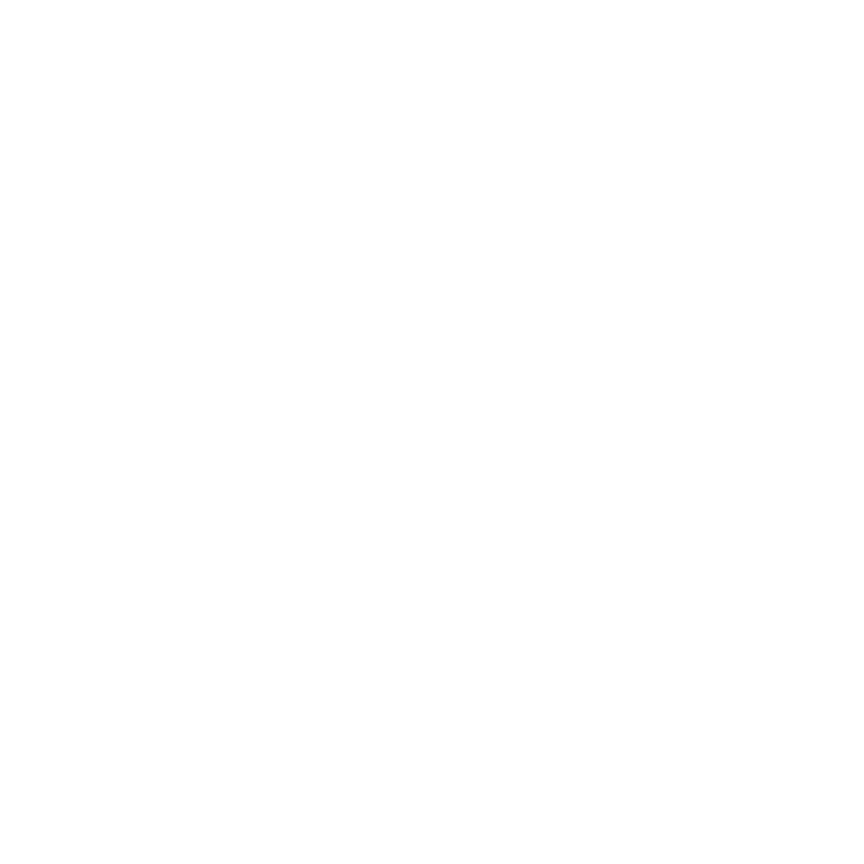

<IPython.core.display.Javascript object>


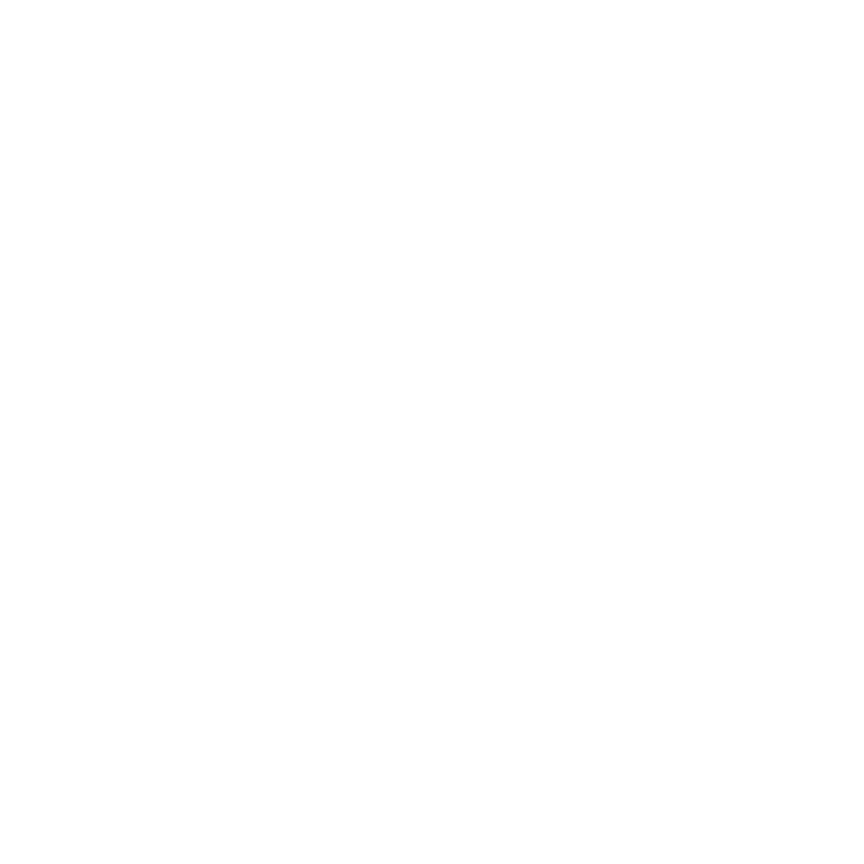

<IPython.core.display.Javascript object>


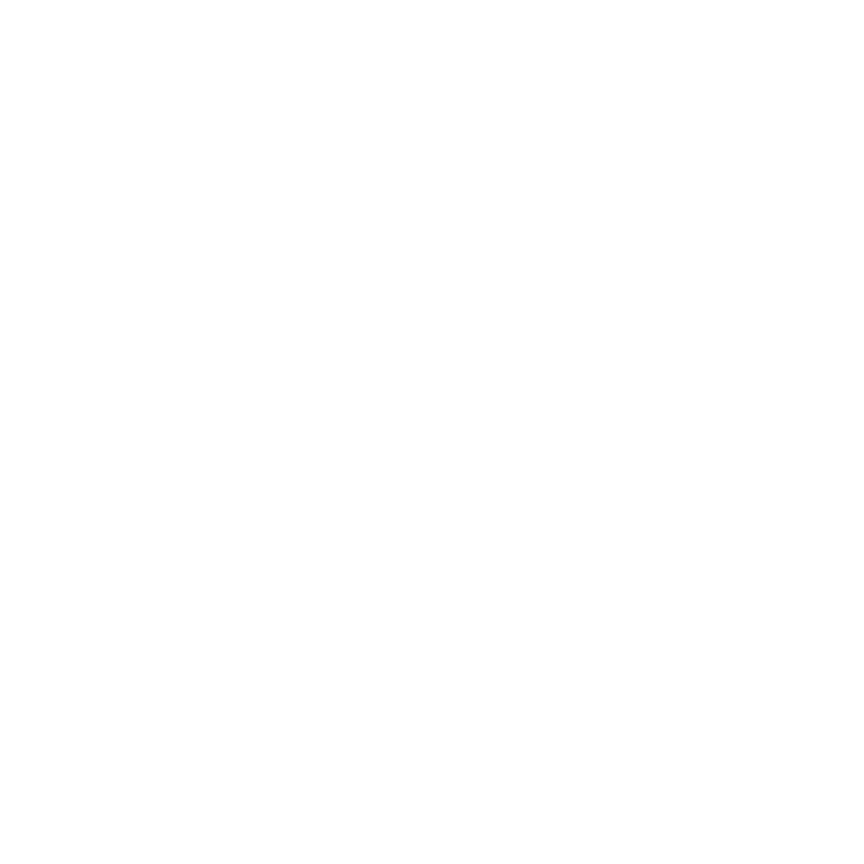

<IPython.core.display.Javascript object>


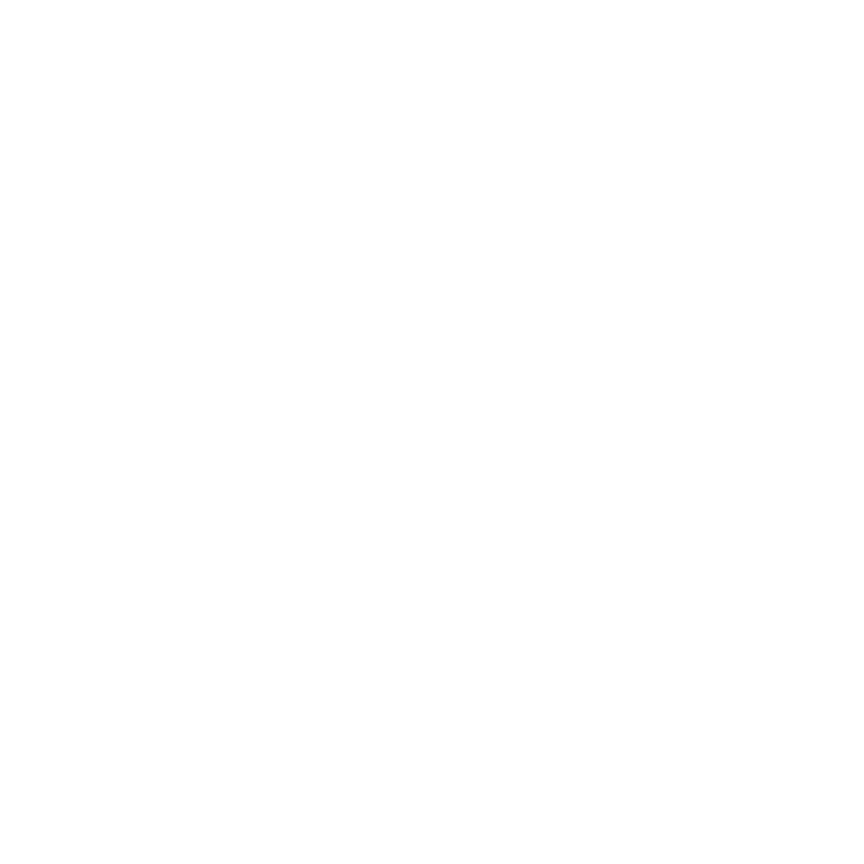

<IPython.core.display.Javascript object>


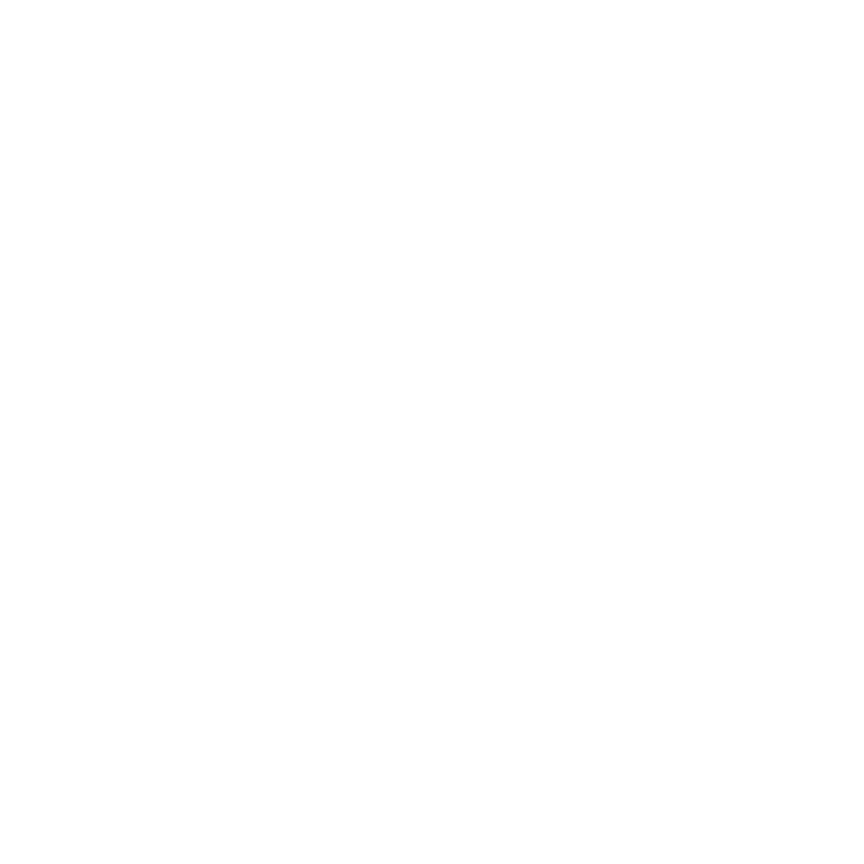

<IPython.core.display.Javascript object>


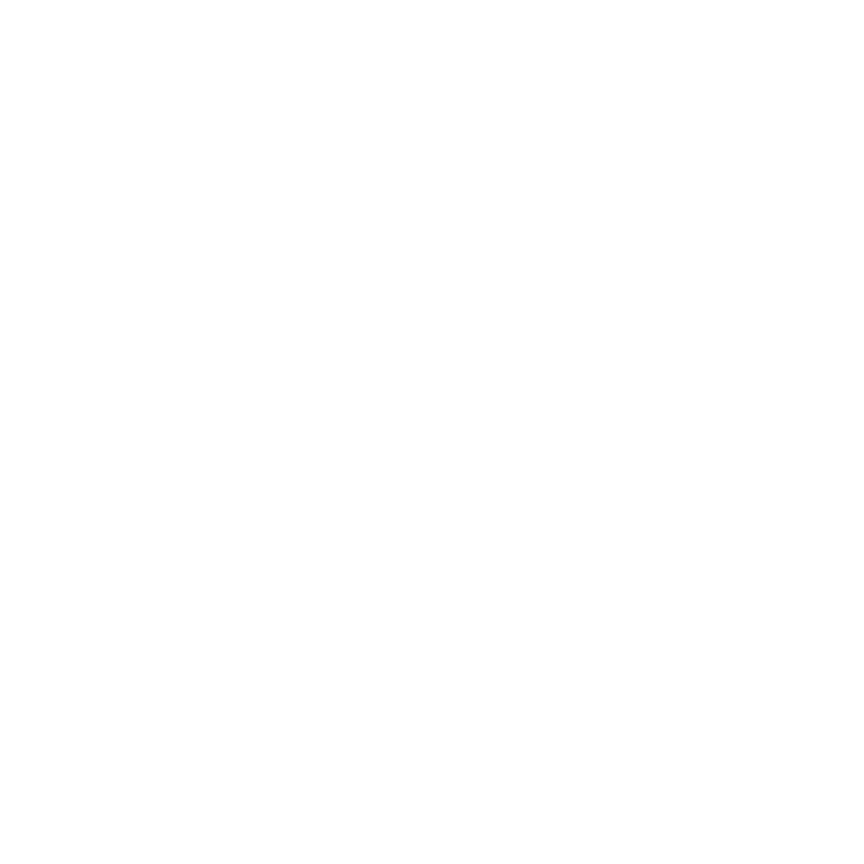

<IPython.core.display.Javascript object>


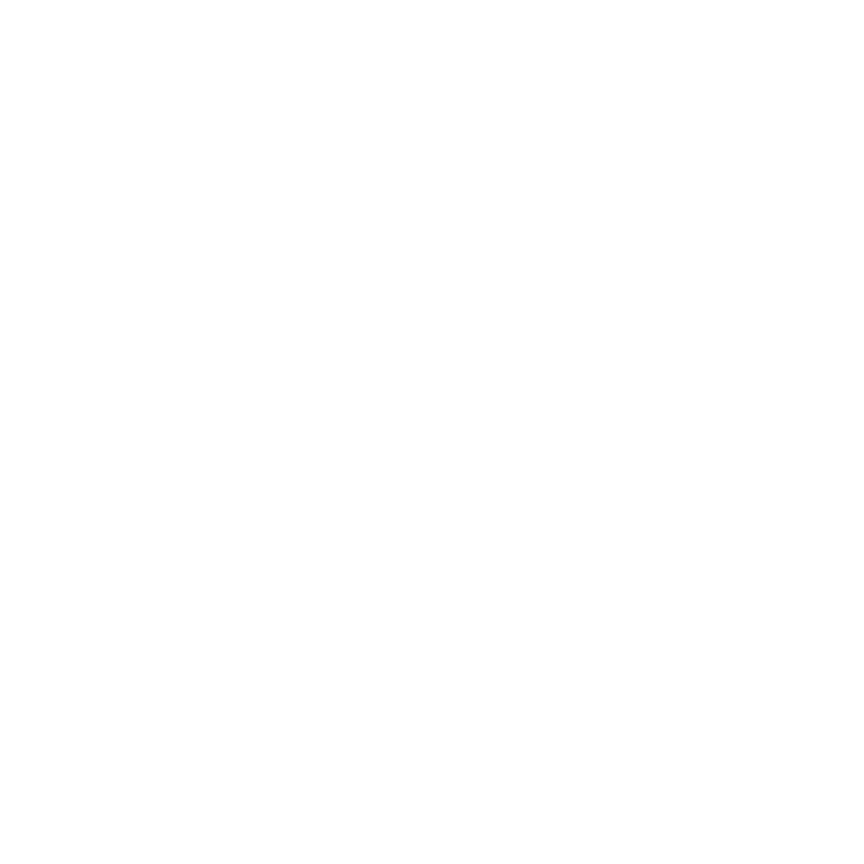

<IPython.core.display.Javascript object>


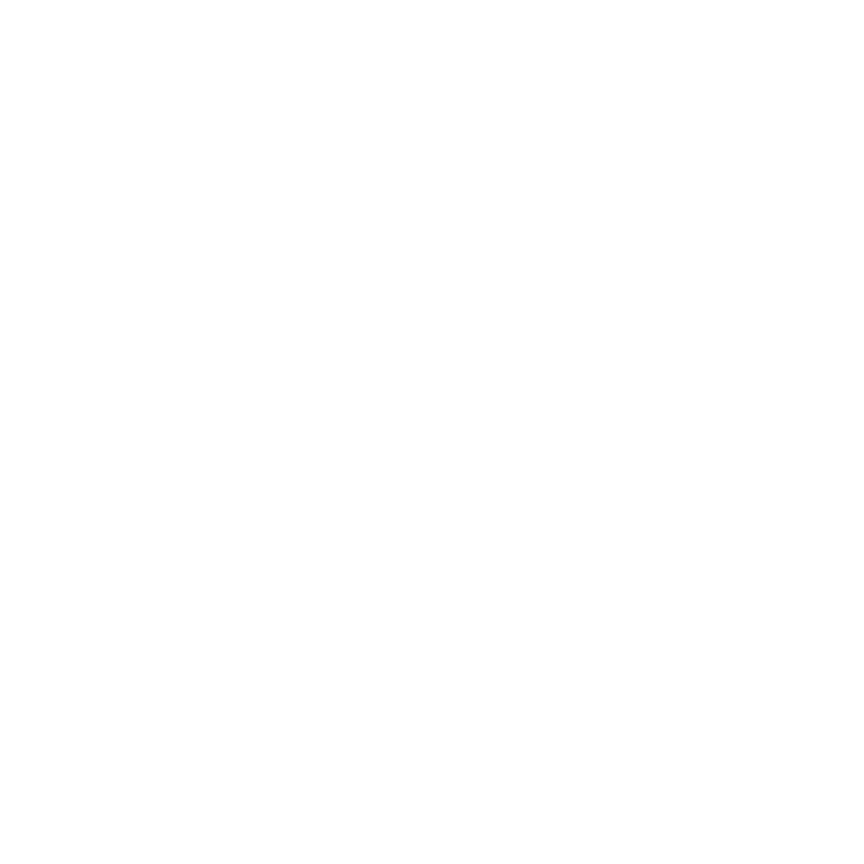

<IPython.core.display.Javascript object>


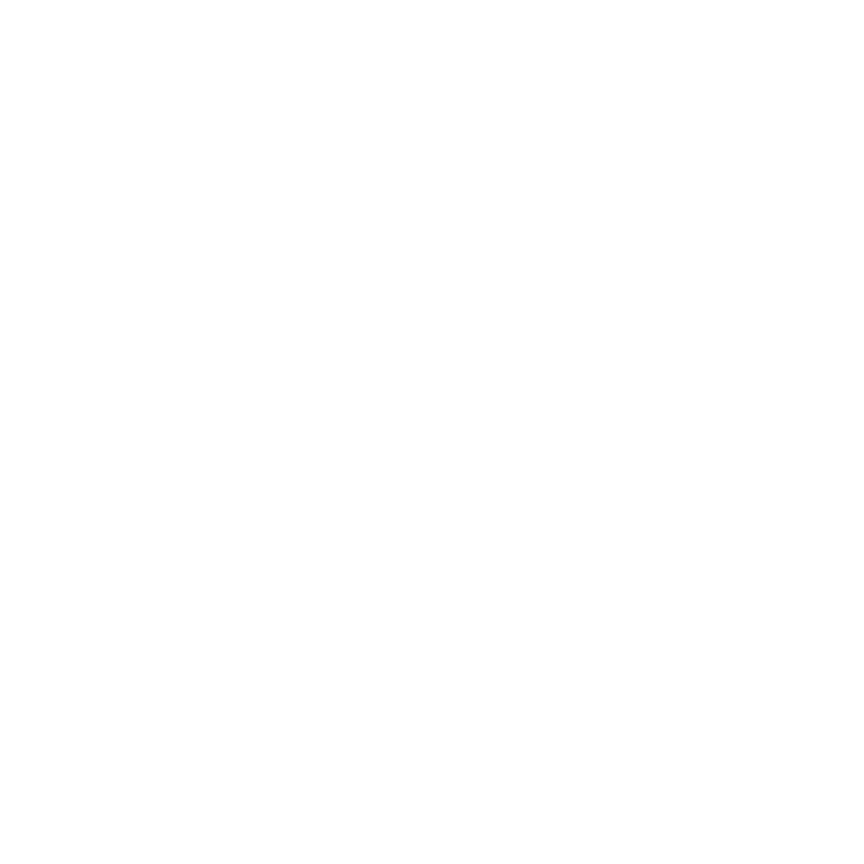

<IPython.core.display.Javascript object>


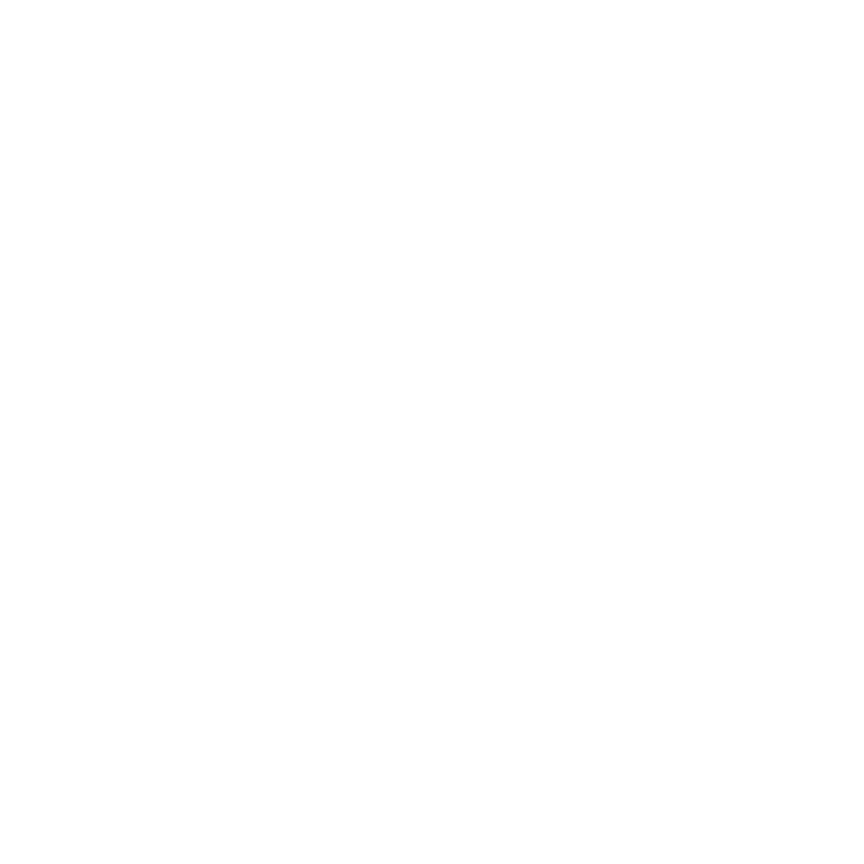

<IPython.core.display.Javascript object>


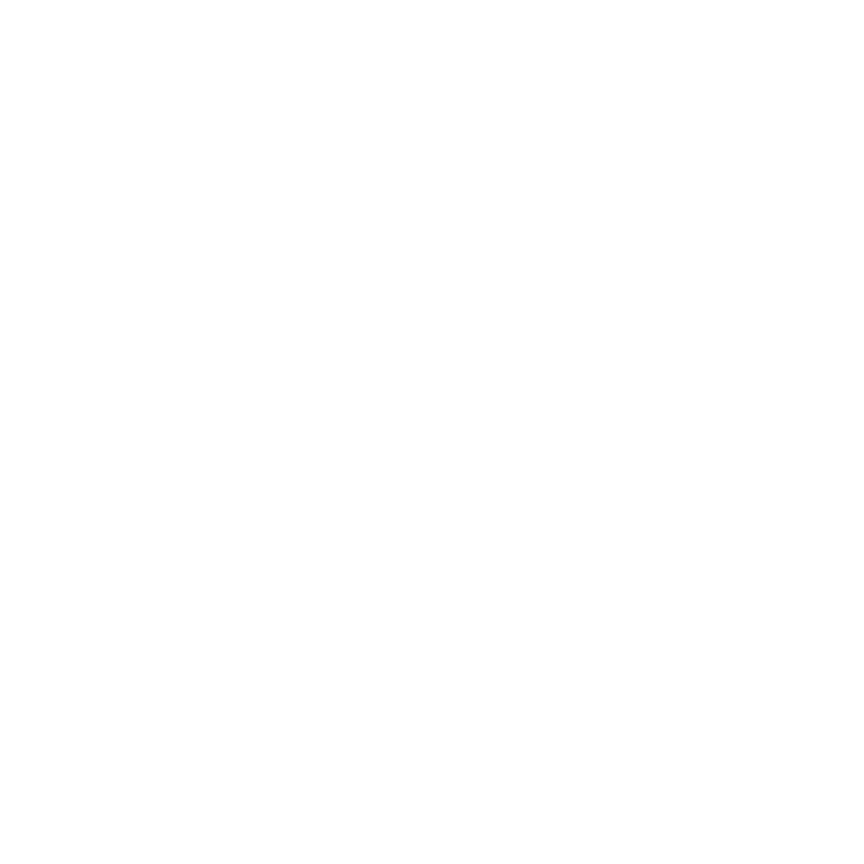

<IPython.core.display.Javascript object>


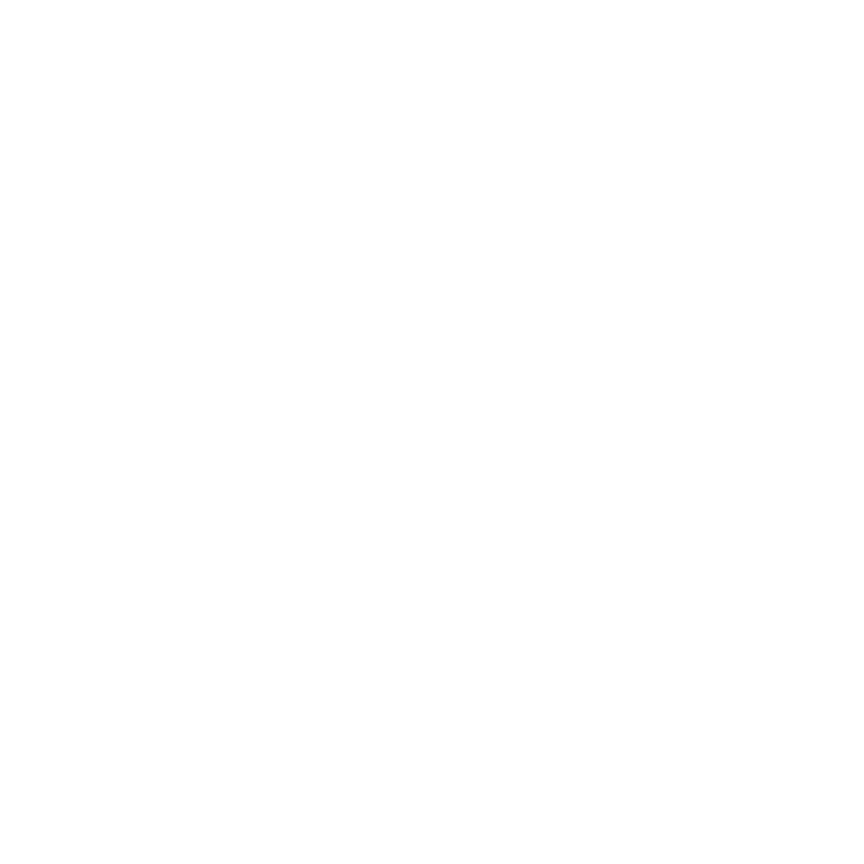

<IPython.core.display.Javascript object>


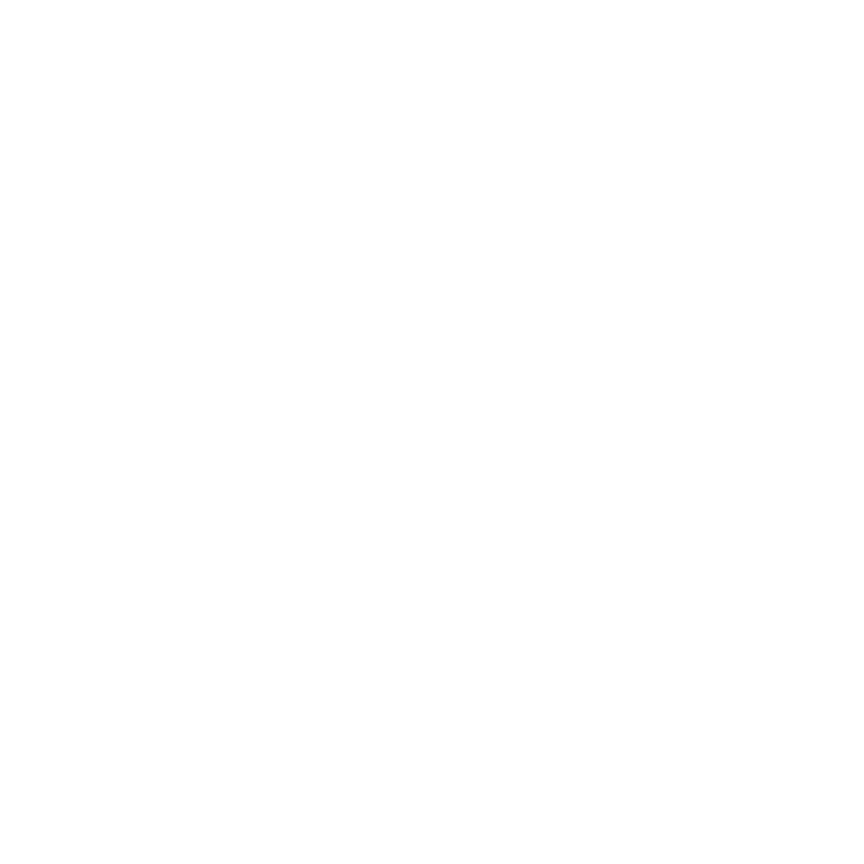

<IPython.core.display.Javascript object>


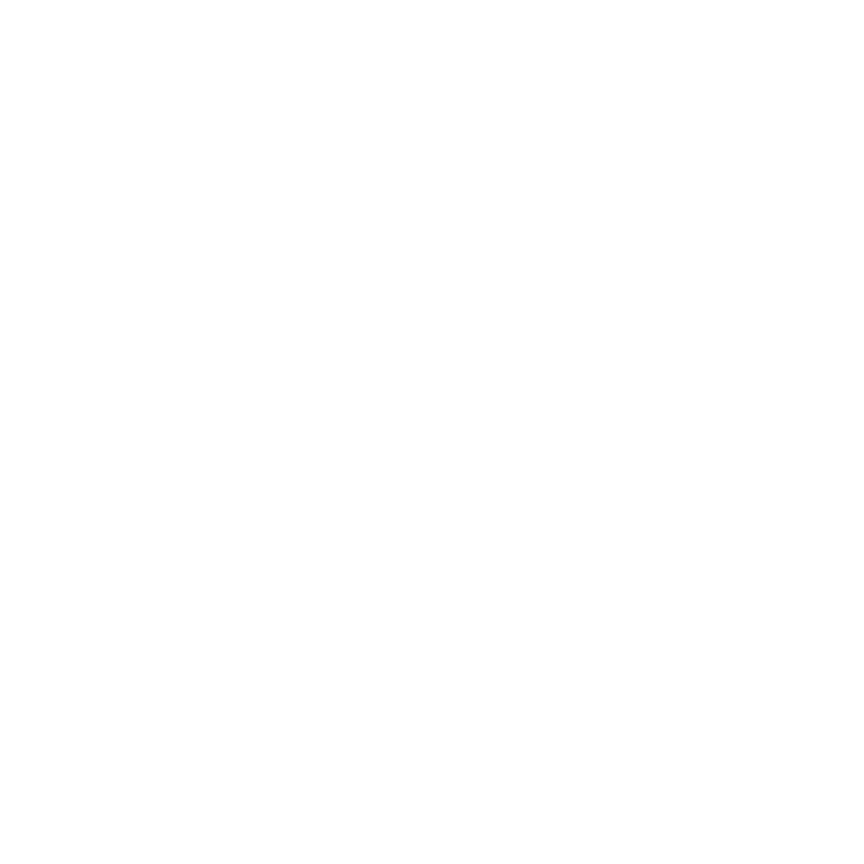

<IPython.core.display.Javascript object>


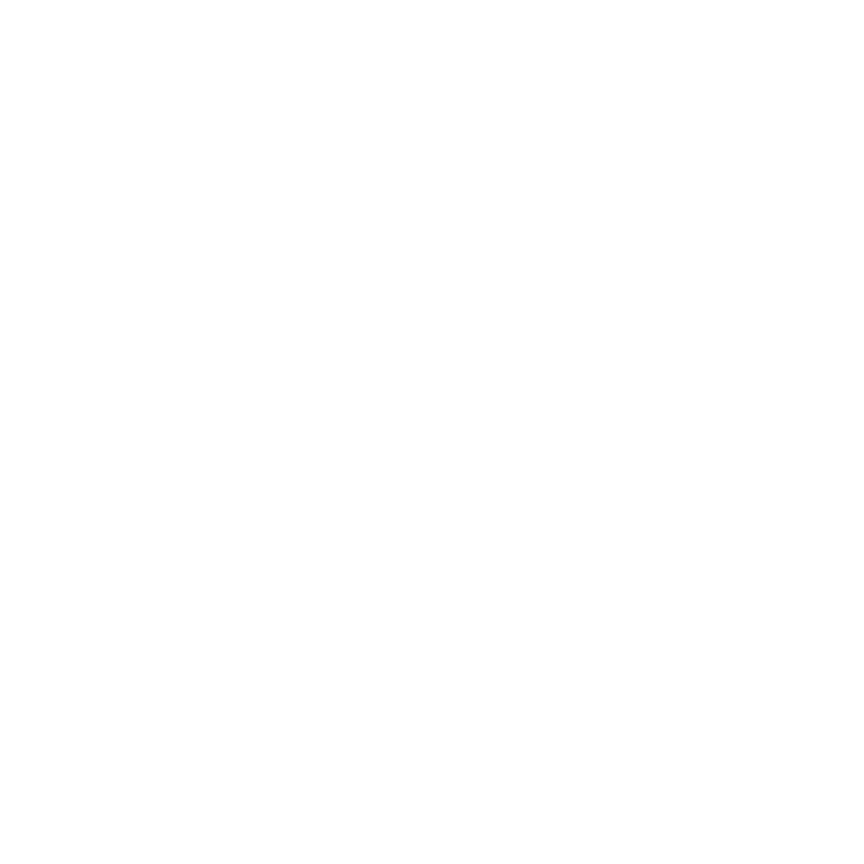

<IPython.core.display.Javascript object>


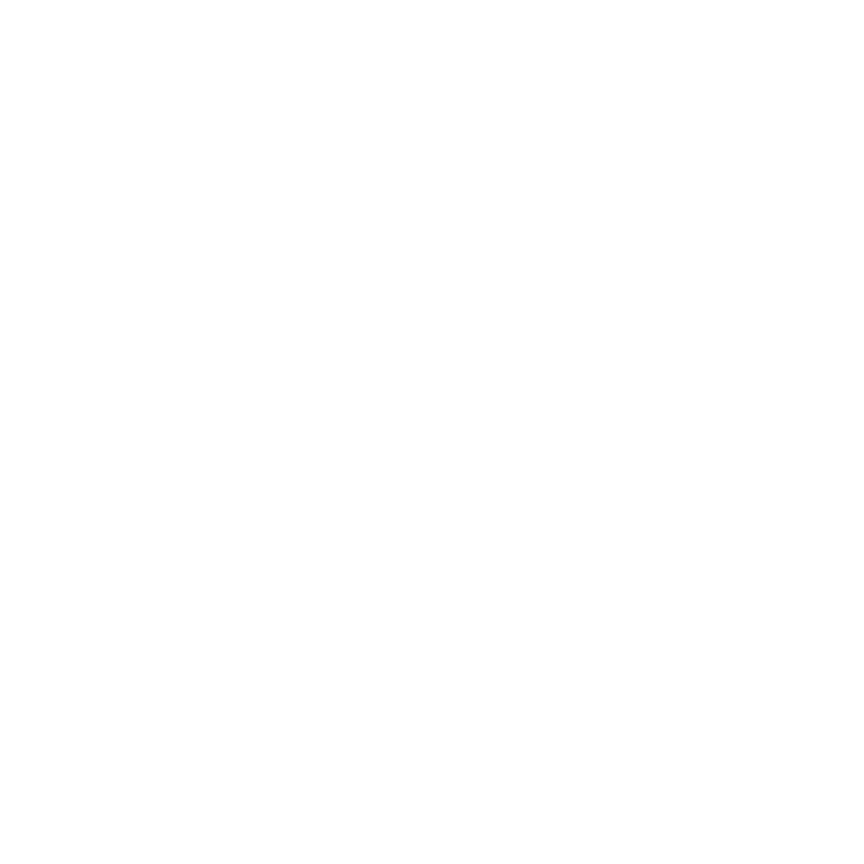

<IPython.core.display.Javascript object>


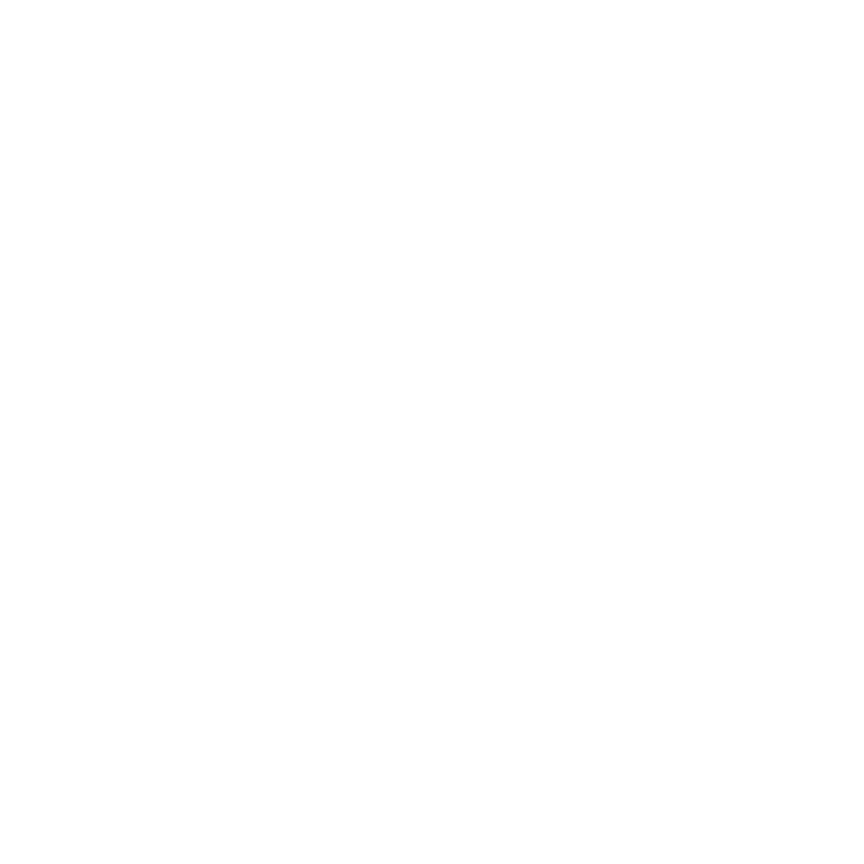

<IPython.core.display.Javascript object>


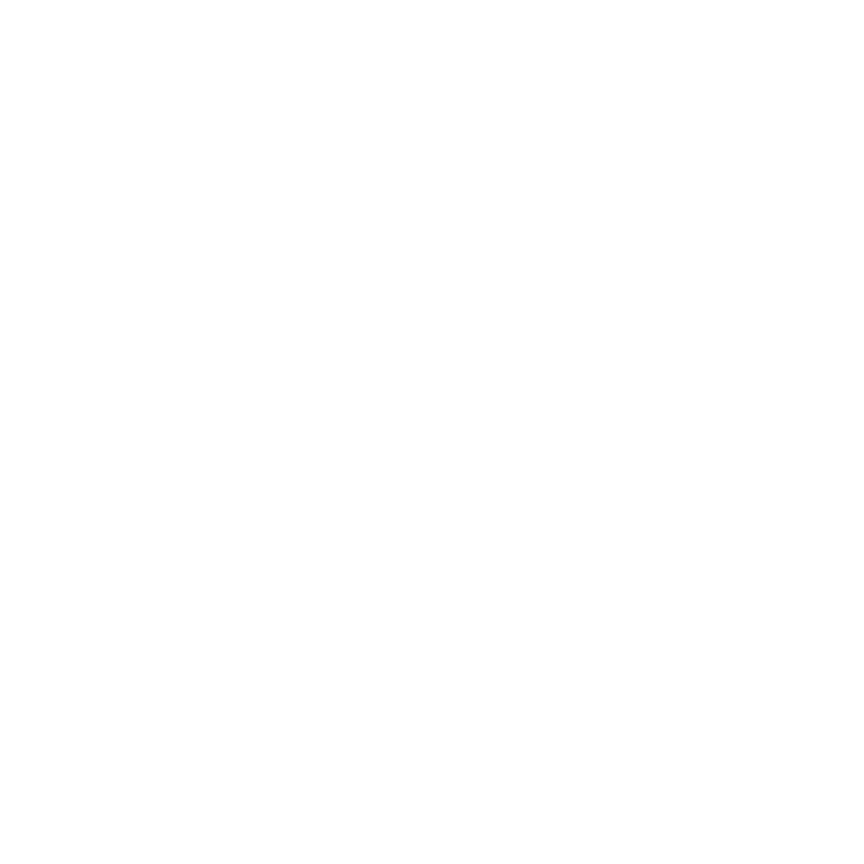

<IPython.core.display.Javascript object>


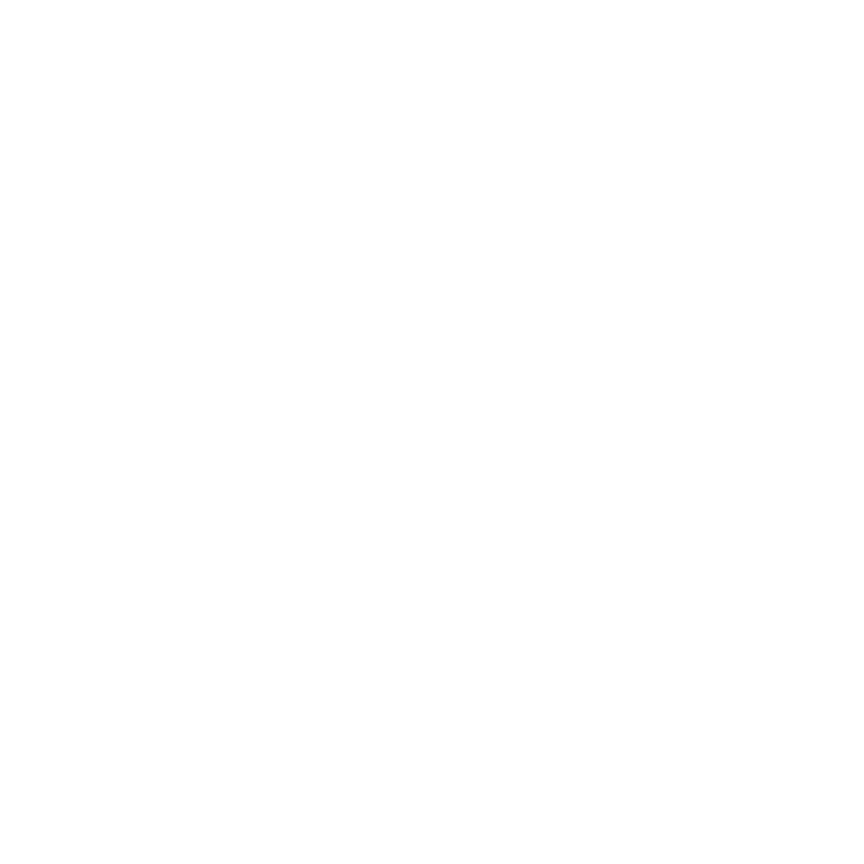

<IPython.core.display.Javascript object>


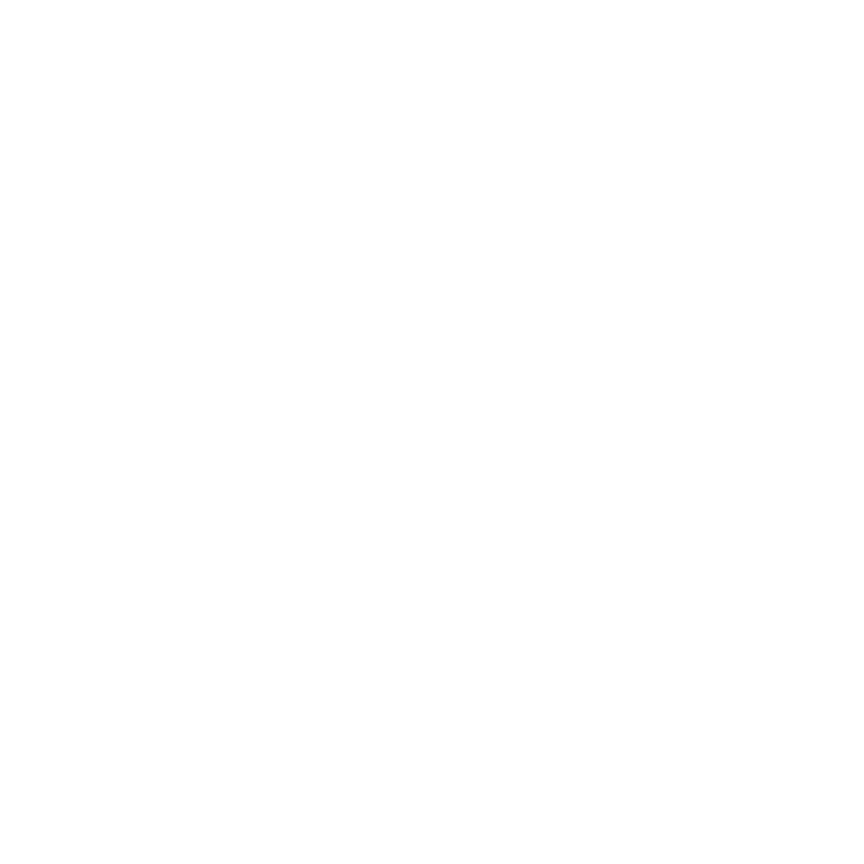

<IPython.core.display.Javascript object>


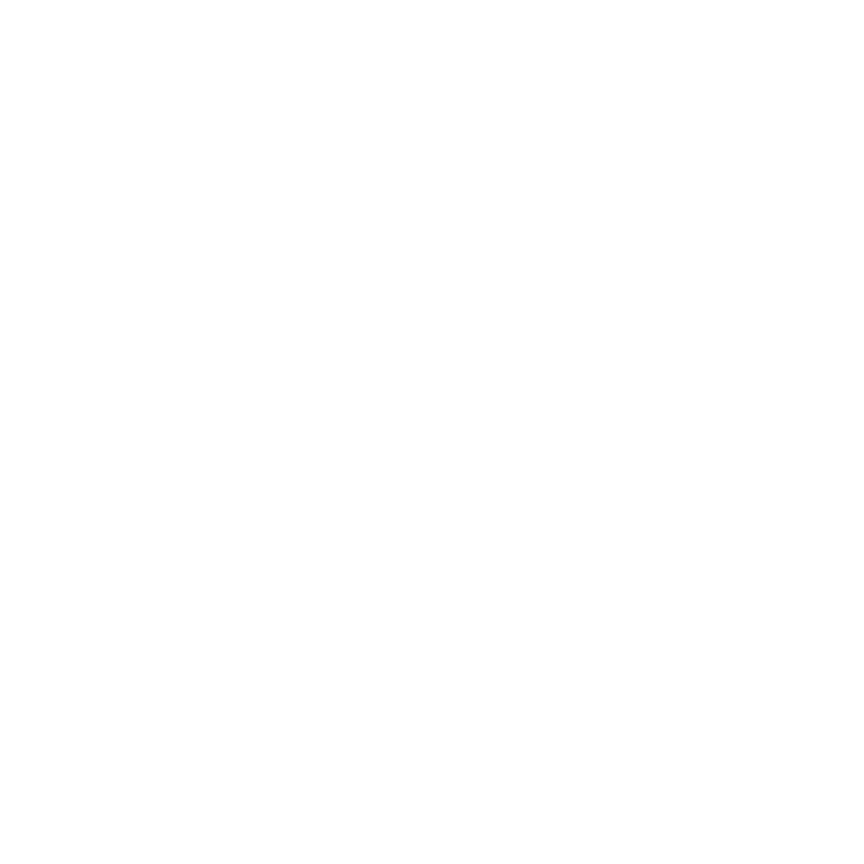

In [9]:
prevt = time.time()

for ei in range(Nepochs):
    #print(ei,"\r",end='')
    x = xinit + sig*torch.randn(N,B)
    xa = torch.zeros(NT,N,B) #save the hidden states for each time bin for plotting
    r = torch.zeros(NT,R,B)

    for ti in range(NT):
        x = x + dt*(-x + torch.tanh(ws.mm(s[ti,:,:]) + J.mm(x) + b))
        xa[ti,:,:] = x
        r[ti,:,:] = wr.mm(x)
        

    loss = torch.sum(torch.pow(r-rtarg,2))/(T*B)

    #do BPTT
    loss.backward()
    opt.step()
    opt.zero_grad()

    if doplot and (ei%Nepochsplot == 0):
        clear_output(wait=True)
        plt.figure(figsize=(6,6))
    
        plt.subplot(211)
        plt.plot(t,rtarg.numpy()[:,0,0],':k')
        plt.plot(t,r.detach().numpy()[:,0,0],'r')
        plt.ylabel("target")

        plt.subplot(212)
        plt.plot(t,xa.detach().numpy()[:,0:5,0])
        plt.xlabel("Time (tau)")
        plt.show();
        
print("train time: ",time.time() - prevt)